In [1]:
import pandas as pd
import numpy as np
# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

config = {
    "mathtext.fontset": 'stix',
    "font.family":'DejaVu Sans',
    "font.family": 'serif',
    "font.serif": ['Arial'],
    "font.size": 24,
    'axes.unicode_minus': False
}
rcParams.update(config)
plt.rcParams['axes.unicode_minus'] = False
large = 22
med = 16
small = 12
params = {
    'axes.titlesize': large,
    'legend.fontsize': med,
    'figure.figsize': (8, 6),
    'axes.labelsize': med,
    'axes.titlesize': med,
    'xtick.labelsize': med,
    'ytick.labelsize': med,
    'figure.titlesize': large
}
plt.rcParams.update(params)
plt.rcParams['figure.dpi'] = 300
seed = 42

In [2]:
dp = pd.read_csv('./data/db_cn.csv').reset_index(drop=True)
dp

,material_id,formula_pretty,formation_energy_per_atom,energy_above_hull,is_gap_direct,band_gap,spacegroup_number,structure,formula,composition,is_GGA_U
0,mp-1113578,Cs2AgAsBr6,-1.374468,0.000000,False,1.1161,225,Full Formula (Cs2 Ag1 As1 Br6)\nReduced Formul...,Cs2AgAsBr6,Cs2 Ag1 As1 Br6,0
1,mp-1113543,Cs2AgAsCl6,-1.562978,0.008312,False,1.5886,225,Full Formula (Cs2 Ag1 As1 Cl6)\nReduced Formul...,Cs2AgAsCl6,Cs2 Ag1 As1 Cl6,0
2,mp-1114305,Cs2AgAsF6,-2.436756,0.055656,False,2.4428,225,Full Formula (Cs2 Ag1 As1 F6)\nReduced Formula...,Cs2AgAsF6,Cs2 Ag1 As1 F6,0
3,mp-1113575,Cs2AgAuBr6,-1.255402,0.024743,False,0.0000,225,Full Formula (Cs2 Ag1 Au1 Br6)\nReduced Formul...,Cs2AgAuBr6,Cs2 Ag1 Au1 Br6,0
4,mp-568448,Cs2AgAuCl6,-1.395263,0.054055,False,0.0000,225,Full Formula (Cs2 Ag1 Au1 Cl6)\nReduced Formul...,Cs2AgAuCl6,Cs2 Ag1 Au1 Cl6,0
...,...,...,...,...,...,...,...,...,...,...,...
1286,mp-1114193,Rb2YHgI6,-1.377484,0.104343,False,0.0000,225,Full Formula (Rb2 Y1 Hg1 I6)\nReduced Formula:...,Rb2YHgI6,Rb2 Y1 Hg1 I6,0
1287,mp-1114129,Rb2YInBr6,-1.954103,0.016794,True,2.8332,225,Full Formula (Rb2 Y1 In1 Br6)\nReduced Formula...,Rb2YInBr6,Rb2 Y1 In1 Br6,0
1288,mp-1114045,Rb2YInCl6,-2.216514,0.041253,False,3.3242,225,Full Formula (Rb2 Y1 In1 Cl6)\nReduced Formula...,Rb2YInCl6,Rb2 Y1 In1 Cl6,0
1289,mp-1113931,Rb2YInF6,-3.290900,0.045683,False,3.6730,225,Full Formula (Rb2 Y1 In1 F6)\nReduced Formula:...,Rb2YInF6,Rb2 Y1 In1 F6,0


In [3]:
counts = dp['is_gap_direct'].value_counts()
counts

is_gap_direct
False    837
True     454
Name: count, dtype: int64

In [4]:
dp['is_gap_direct'] = dp['is_gap_direct'].replace({True: 1, False: 0})

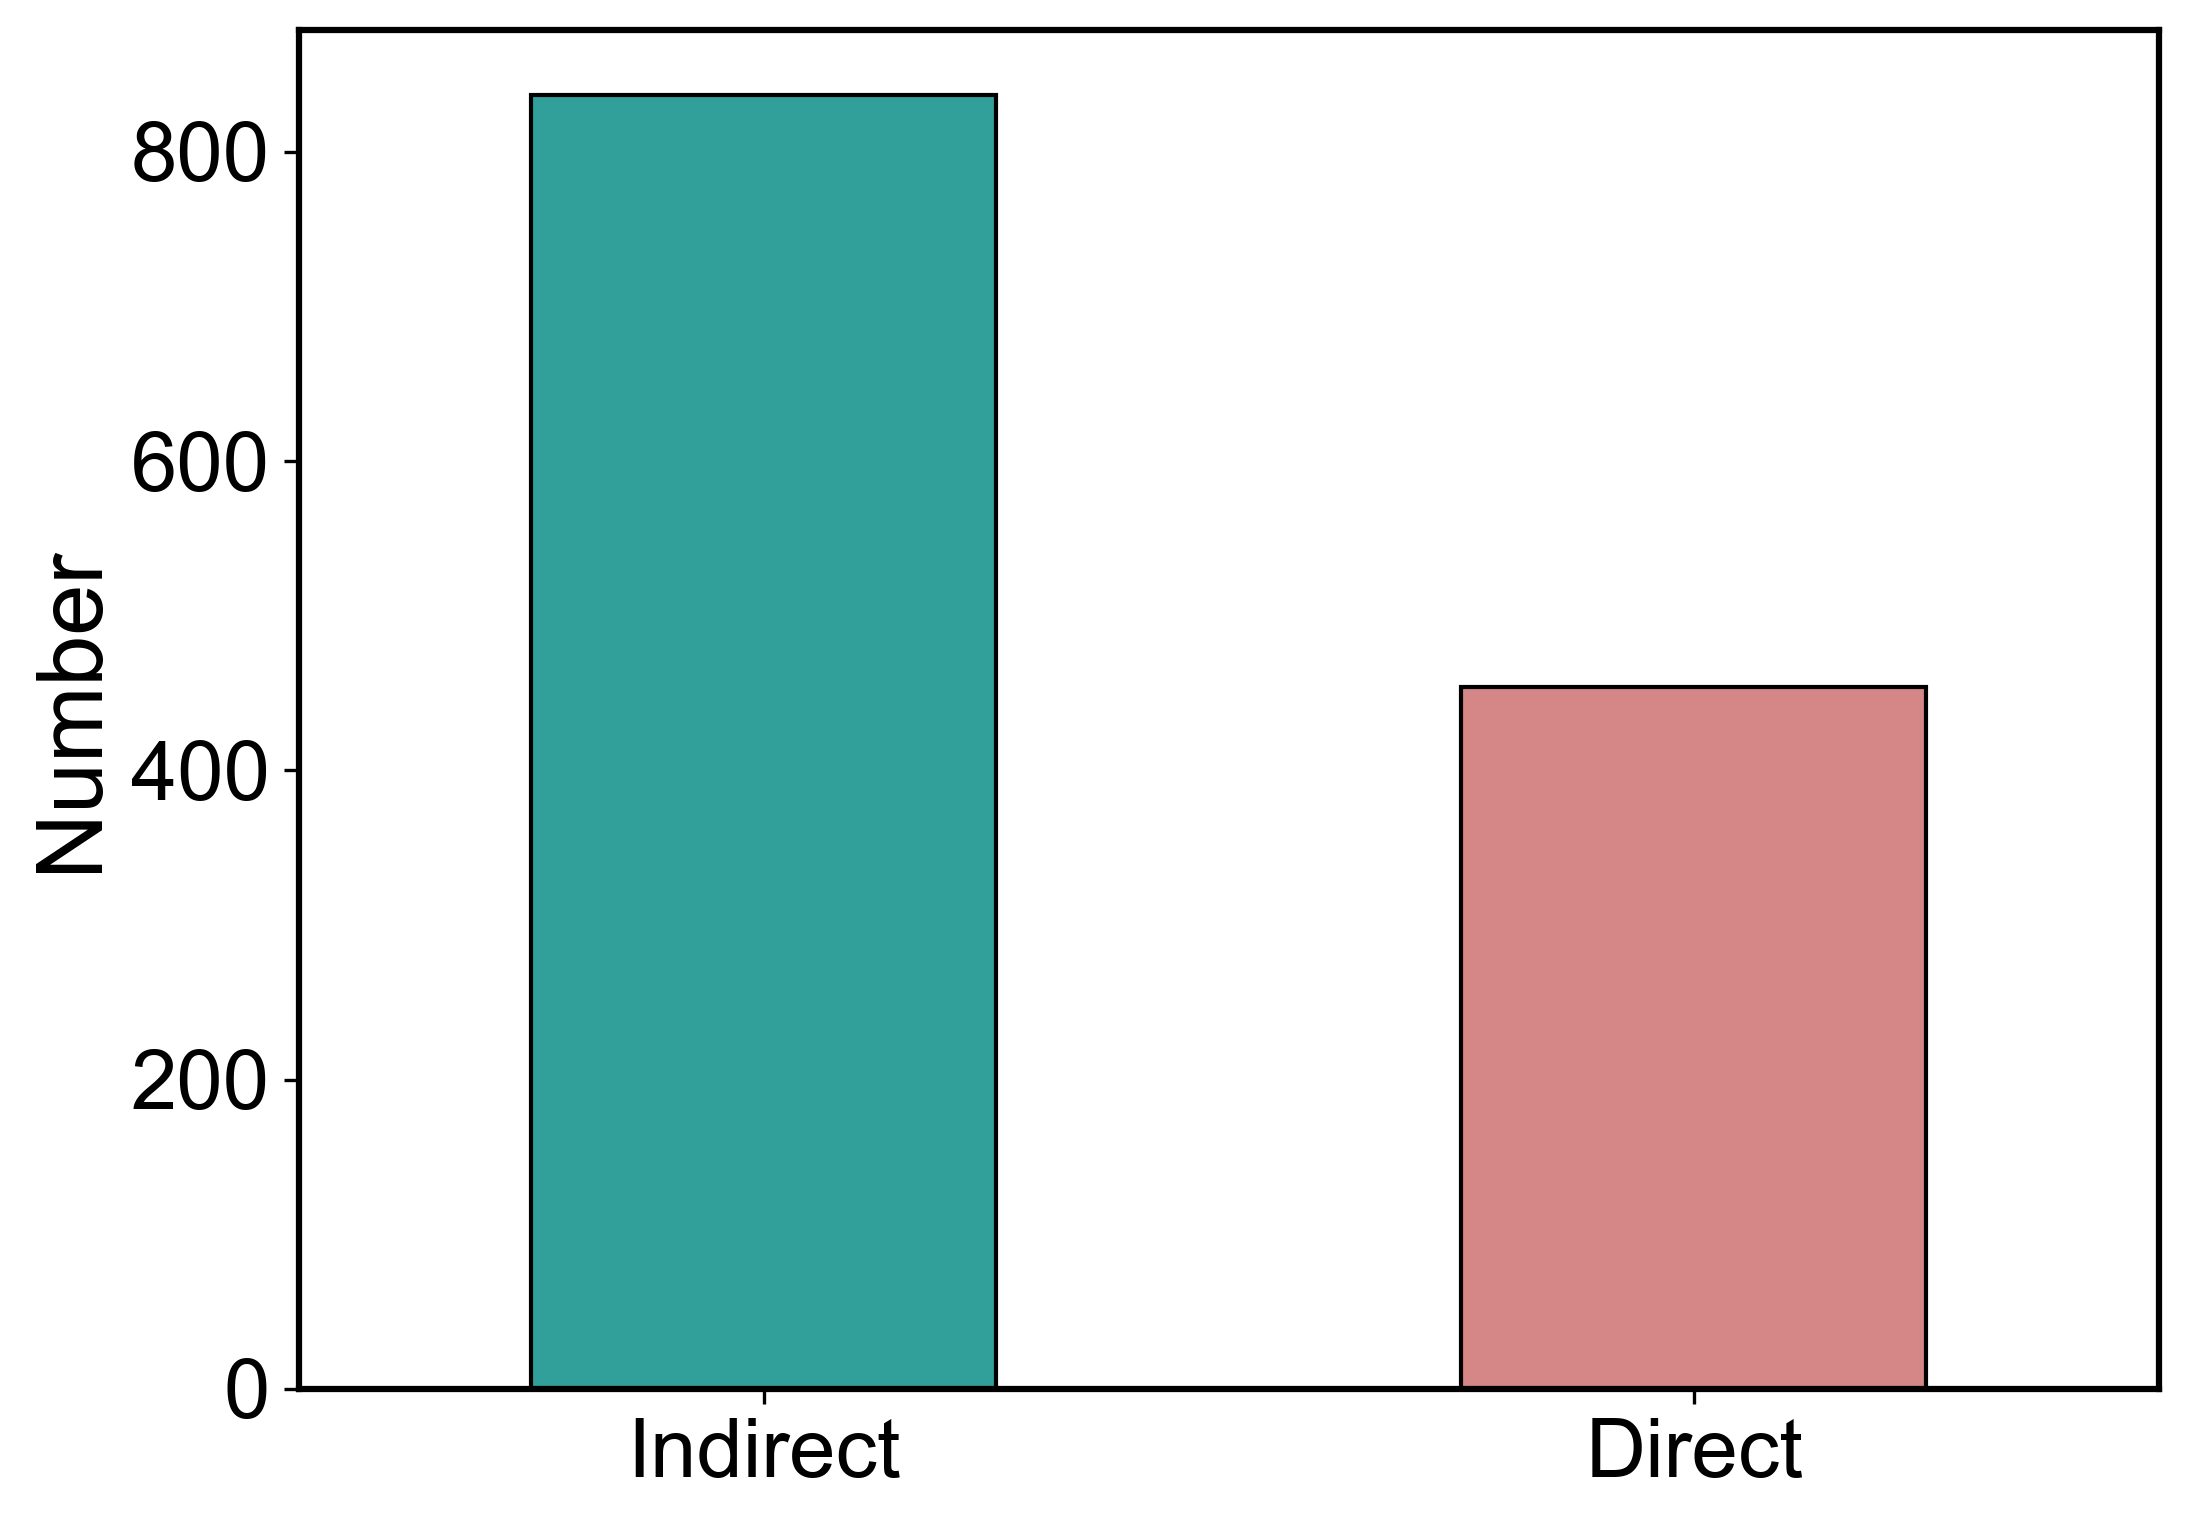

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

y_counts = dp['is_gap_direct'].value_counts()
y_counts.plot(kind='bar', color=['#31A09A', '#D58686'],edgecolor='black')
plt.ylabel('Number', fontsize=22)
plt.xticks(ticks=[0, 1], labels=['Indirect', 'Direct'], rotation=0, fontsize=22)

ax = plt.gca() 
ax.spines['top'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel('') 
plt.savefig('./picture/bg_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [6]:
X = pd.read_csv('./data/features_cn.csv').reset_index(drop=True)
X

,A_Density,B_Density,C_Density,X_Density,A_dipole Polarizability,B_dipole Polarizability,C_dipole Polarizability,X_dipole Polarizability,A_covalent Radius,B_covalent Radius,C_covalent Radius,X_covalent Radius,A_atomic Radius,B_atomic Radius,C_atomic Radius,X_atomic Radius,A_FirstIonization,B_FirstIonization,C_FirstIonization,X_FirstIonization,A_number of Valence Electrons,B_number of Valence Electrons,C_number of Valence Electrons,X_number of Valence Electrons,A_number,B_number,C_number,X_number,A_Period,B_Period,...,A-B_covalent Radius,A-C_covalent Radius,(A+B+C)-X_covalent Radius,A-B_atomic Radius,A-C_atomic Radius,(A+B+C)-X_atomic Radius,A-B_FirstIonization,A-C_FirstIonization,(A+B+C)-X_FirstIonization,A-B_number of Valence Electrons,A-C_number of Valence Electrons,(A+B+C)-X_number of Valence Electrons,A-B_number,A-C_number,(A+B+C)-X_number,A-B_Period,A-C_Period,(A+B+C)-X_Period,A-B_Electronegativity,A-C_Electronegativity,(A+B+C)-X_Electronegativity,A-B_number of s+p Electrons,A-C_number of s+p Electrons,(A+B+C)-X_number of s+p Electrons,A-B_number of d Electrons,A-C_number of d Electrons,(A+B+C)-X_number of d Electrons,A-B_Mulliken EN,A-C_Mulliken EN,(A+B+C)-X_Mulliken EN
0,3.74,10.50,5.78,18.72000,801.8,55.0,30.00,126.00,464,128,121,684,5.2,1.6,1.15,6.9,751.4,731.0,947.0,6839.4,2,11,5,42,110,47,33,210,12,5,...,336,343,29,3.6,4.05,1.05,20.4,195.6,4410.0,9,3,24,63,77,20,7,8,3,0.35,0.60,12.07,1,3,34,10,0,10,0.08,0.94,31.44
1,3.74,10.50,5.78,0.01926,801.8,55.0,30.00,87.60,464,128,121,594,5.2,1.6,1.15,6.0,751.4,731.0,947.0,7507.2,2,11,5,42,110,47,33,102,12,5,...,336,343,119,3.6,4.05,1.95,20.4,195.6,5077.8,9,3,24,63,77,88,7,8,3,0.35,0.60,13.27,1,3,34,10,0,10,0.08,0.94,35.70
2,3.74,10.50,5.78,0.01020,801.8,55.0,30.00,22.44,464,128,121,384,5.2,1.6,1.15,3.0,751.4,731.0,947.0,10086.0,2,11,5,42,110,47,33,54,12,5,...,336,343,329,3.6,4.05,4.95,20.4,195.6,7656.6,9,3,24,63,77,136,7,8,9,0.35,0.60,18.19,1,3,34,10,0,10,0.08,0.94,48.36
3,3.74,10.50,19.30,18.72000,801.8,55.0,36.00,126.00,464,128,124,684,5.2,1.6,1.35,6.9,751.4,731.0,890.1,6839.4,2,11,11,42,110,47,79,210,12,5,...,336,340,32,3.6,3.85,1.25,20.4,138.7,4466.9,9,9,18,63,31,26,7,6,1,0.35,0.96,11.71,1,1,38,10,10,20,0.08,1.41,30.97
4,3.74,10.50,19.30,0.01926,801.8,55.0,36.00,87.60,464,128,124,594,5.2,1.6,1.35,6.0,751.4,731.0,890.1,7507.2,2,11,11,42,110,47,79,102,12,5,...,336,340,122,3.6,3.85,2.15,20.4,138.7,5134.7,9,9,18,63,31,134,7,6,5,0.35,0.96,12.91,1,1,38,10,10,20,0.08,1.41,35.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,3.06,4.47,13.50,29.58000,639.6,162.0,33.91,197.40,420,163,133,798,4.7,1.8,1.50,8.4,806.0,600.0,1007.1,6050.4,2,3,12,42,74,39,80,318,10,5,...,257,287,82,2.9,3.20,0.40,206.0,201.1,3637.3,1,10,25,35,6,125,5,4,9,0.42,0.36,11.10,0,0,36,1,10,49,1.49,0.23,27.78
1287,3.06,4.47,7.31,18.72000,639.6,162.0,65.00,126.00,420,163,142,684,4.7,1.8,1.55,6.9,806.0,600.0,558.3,6839.4,2,3,3,42,74,39,49,210,10,5,...,257,278,41,2.9,3.15,1.15,206.0,247.7,4875.1,1,1,34,35,25,48,5,5,4,0.42,0.14,13.12,0,1,35,1,10,11,1.49,1.58,34.57
1288,3.06,4.47,7.31,0.01926,639.6,162.0,65.00,87.60,420,163,142,594,4.7,1.8,1.55,6.0,806.0,600.0,558.3,7507.2,2,3,3,42,74,39,49,102,10,5,...,257,278,131,2.9,3.15,2.05,206.0,247.7,5542.9,1,1,34,35,25,60,5,5,2,0.42,0.14,14.32,0,1,35,1,10,11,1.49,1.58,38.83
1289,3.06,4.47,7.31,0.01020,639.6,162.0,65.00,22.44,420,163,142,384,4.7,1.8,1.55,3.0,806.0,600.0,558.3,10086.0,2,3,3,42,74,39,49,54,10,5,...,257,278,341,2.9,3.15,5.05,206.0,247.7,8121.7,1,1,34,35,25,108,5,5,8,0.42,0.14,19.24,0,1,35,1,10,11,1.49,1.58,51.49


In [7]:
y = dp['is_gap_direct']

In [8]:
from scipy.stats import spearmanr
def remove_collinear_features(x, y,threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''  
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
#                 print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                x1 = x[col.values[0]]
                x2 = x[row.values[0]]
                corr1,p1 = spearmanr(x1, y)
                corr2,p2 = spearmanr(x2, y)
                if np.abs(corr1) < np.abs(corr2):
                    drop_cols.append(col.values[0])
                else:
                    drop_cols.append(row.values[0])
    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    return x

In [9]:
from sklearn.model_selection import train_test_split
X = remove_collinear_features(X, y, 0.8)
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=0)
print(X.shape)

(1291, 28)


In [10]:
X_columns = X.columns

In [11]:
from sklearn.metrics import roc_auc_score,accuracy_score,f1_score,matthews_corrcoef,classification_report,roc_curve, auc,precision_score,recall_score
from sklearn.model_selection import StratifiedKFold
def fold5(model, X, y,name='',is_plot=True):
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    accuracies = []
    f1s = []
    mccs = []
    roc_aucs = []
    roc_curves = []  
    recalls = []
    fig, ax = plt.subplots() 
    for i, (train_index, test_index) in enumerate(kf.split(X, y)):
        try:
            X = X.values
            y = y.values
        except:
            pass
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        if is_plot:
            roc_curve_obj, = ax.plot(fpr, tpr, label='Fold %d (area = %0.3f)' % (i + 1, roc_auc), lw=1.5,linestyle='-.',alpha=0.75)
            roc_curves.append(roc_curve_obj)  
            handles, labels = ax.get_legend_handles_labels()
            ax.legend(handles[:5], labels[:5], loc="lower right")

            ax.plot([0, 1], [0, 1], 'r--', lw=1, alpha=0.8)  
            ax.set_xlim([-0.025, 1.0])  
            ax.set_ylim([0.0, 1.05])  
            ax.set_xlabel('False Positive Rate')  
            ax.set_ylabel('True Positive Rate')  
            ax.set_title(f'ROC Curve: {name}') 
            ax.set_axisbelow(True)
            ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
        accuracies.append(accuracy_score(y_test, y_pred))
        f1s.append(f1_score(y_test, y_pred))
        mccs.append(matthews_corrcoef(y_test, y_pred))
        roc_aucs.append(roc_auc)
        report = classification_report(y_test, y_pred)
        recall = float(report.split()[11])
        recalls.append(recall)
        result = {
        'accuracy': np.mean(accuracies),
        'f1-score': np.mean(f1s),
        'mcc': np.mean(mccs),
        'roc_auc': np.mean(roc_aucs),
        'recall':np.mean(recalls),
        'accuracy_std': np.std(accuracies),
        'f1-score_std': np.std(f1s),
        'mcc_std': np.std(mccs),
        'roc_auc_std': np.std(roc_aucs),
        'recall_std':np.std(recalls),
    }
    if is_plot:
        plt.show()
    return result

In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
seed =42
kn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=seed)
rf = RandomForestClassifier(n_jobs=-1,random_state=seed)
mlp = MLPClassifier(alpha=1, max_iter=1000,random_state=seed)
lgbm = LGBMClassifier(random_state=seed,verbose=0)
xb = XGBClassifier(random_state=seed,n_jobs=-1)
ext = ExtraTreesClassifier(n_jobs=-1,random_state=seed) 
gbc = GradientBoostingClassifier(random_state=seed)
gnb = GaussianNB()

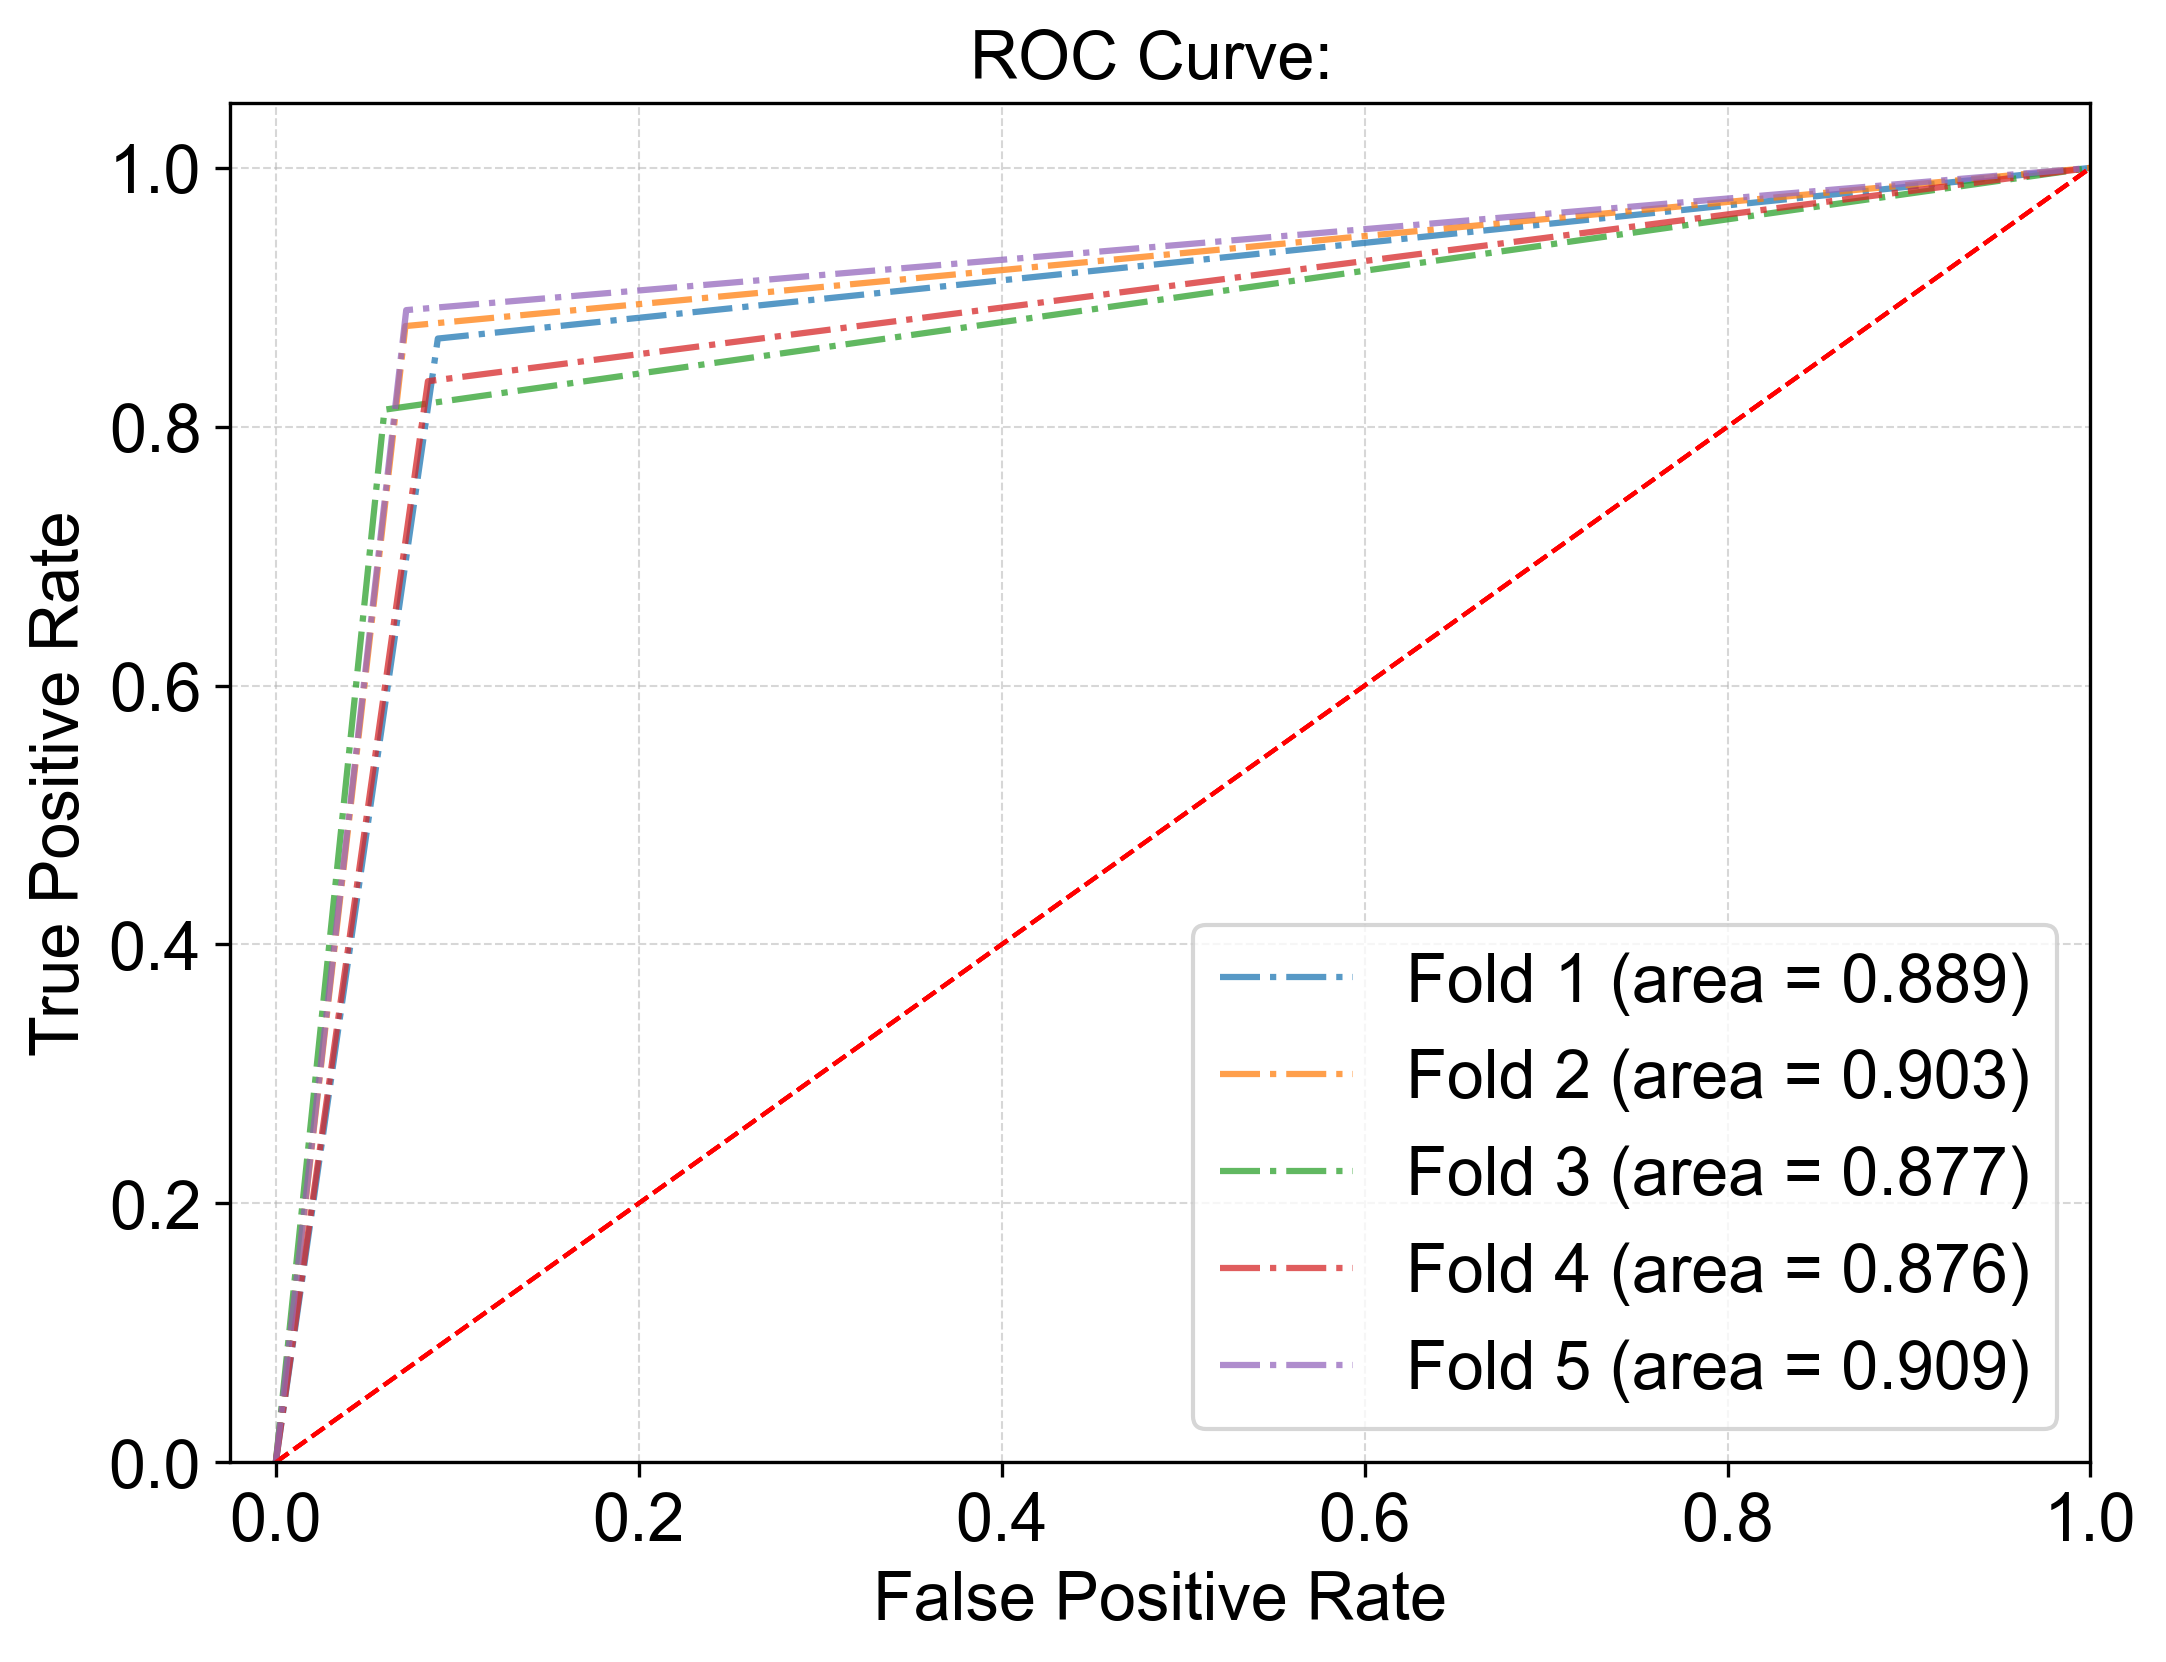

{'accuracy': 0.9008560055071682,
 'f1-score': 0.8585820609394956,
 'mcc': 0.7826460384904622,
 'roc_auc': 0.8908088036381449,
 'recall': 0.858,
 'accuracy_std': 0.010242654473334814,
 'f1-score_std': 0.015639628275855137,
 'mcc_std': 0.02295348700106652,
 'roc_auc_std': 0.013565086551840742,
 'recall_std': 0.029257477676655576}

In [13]:
fold5(dt,X,y)

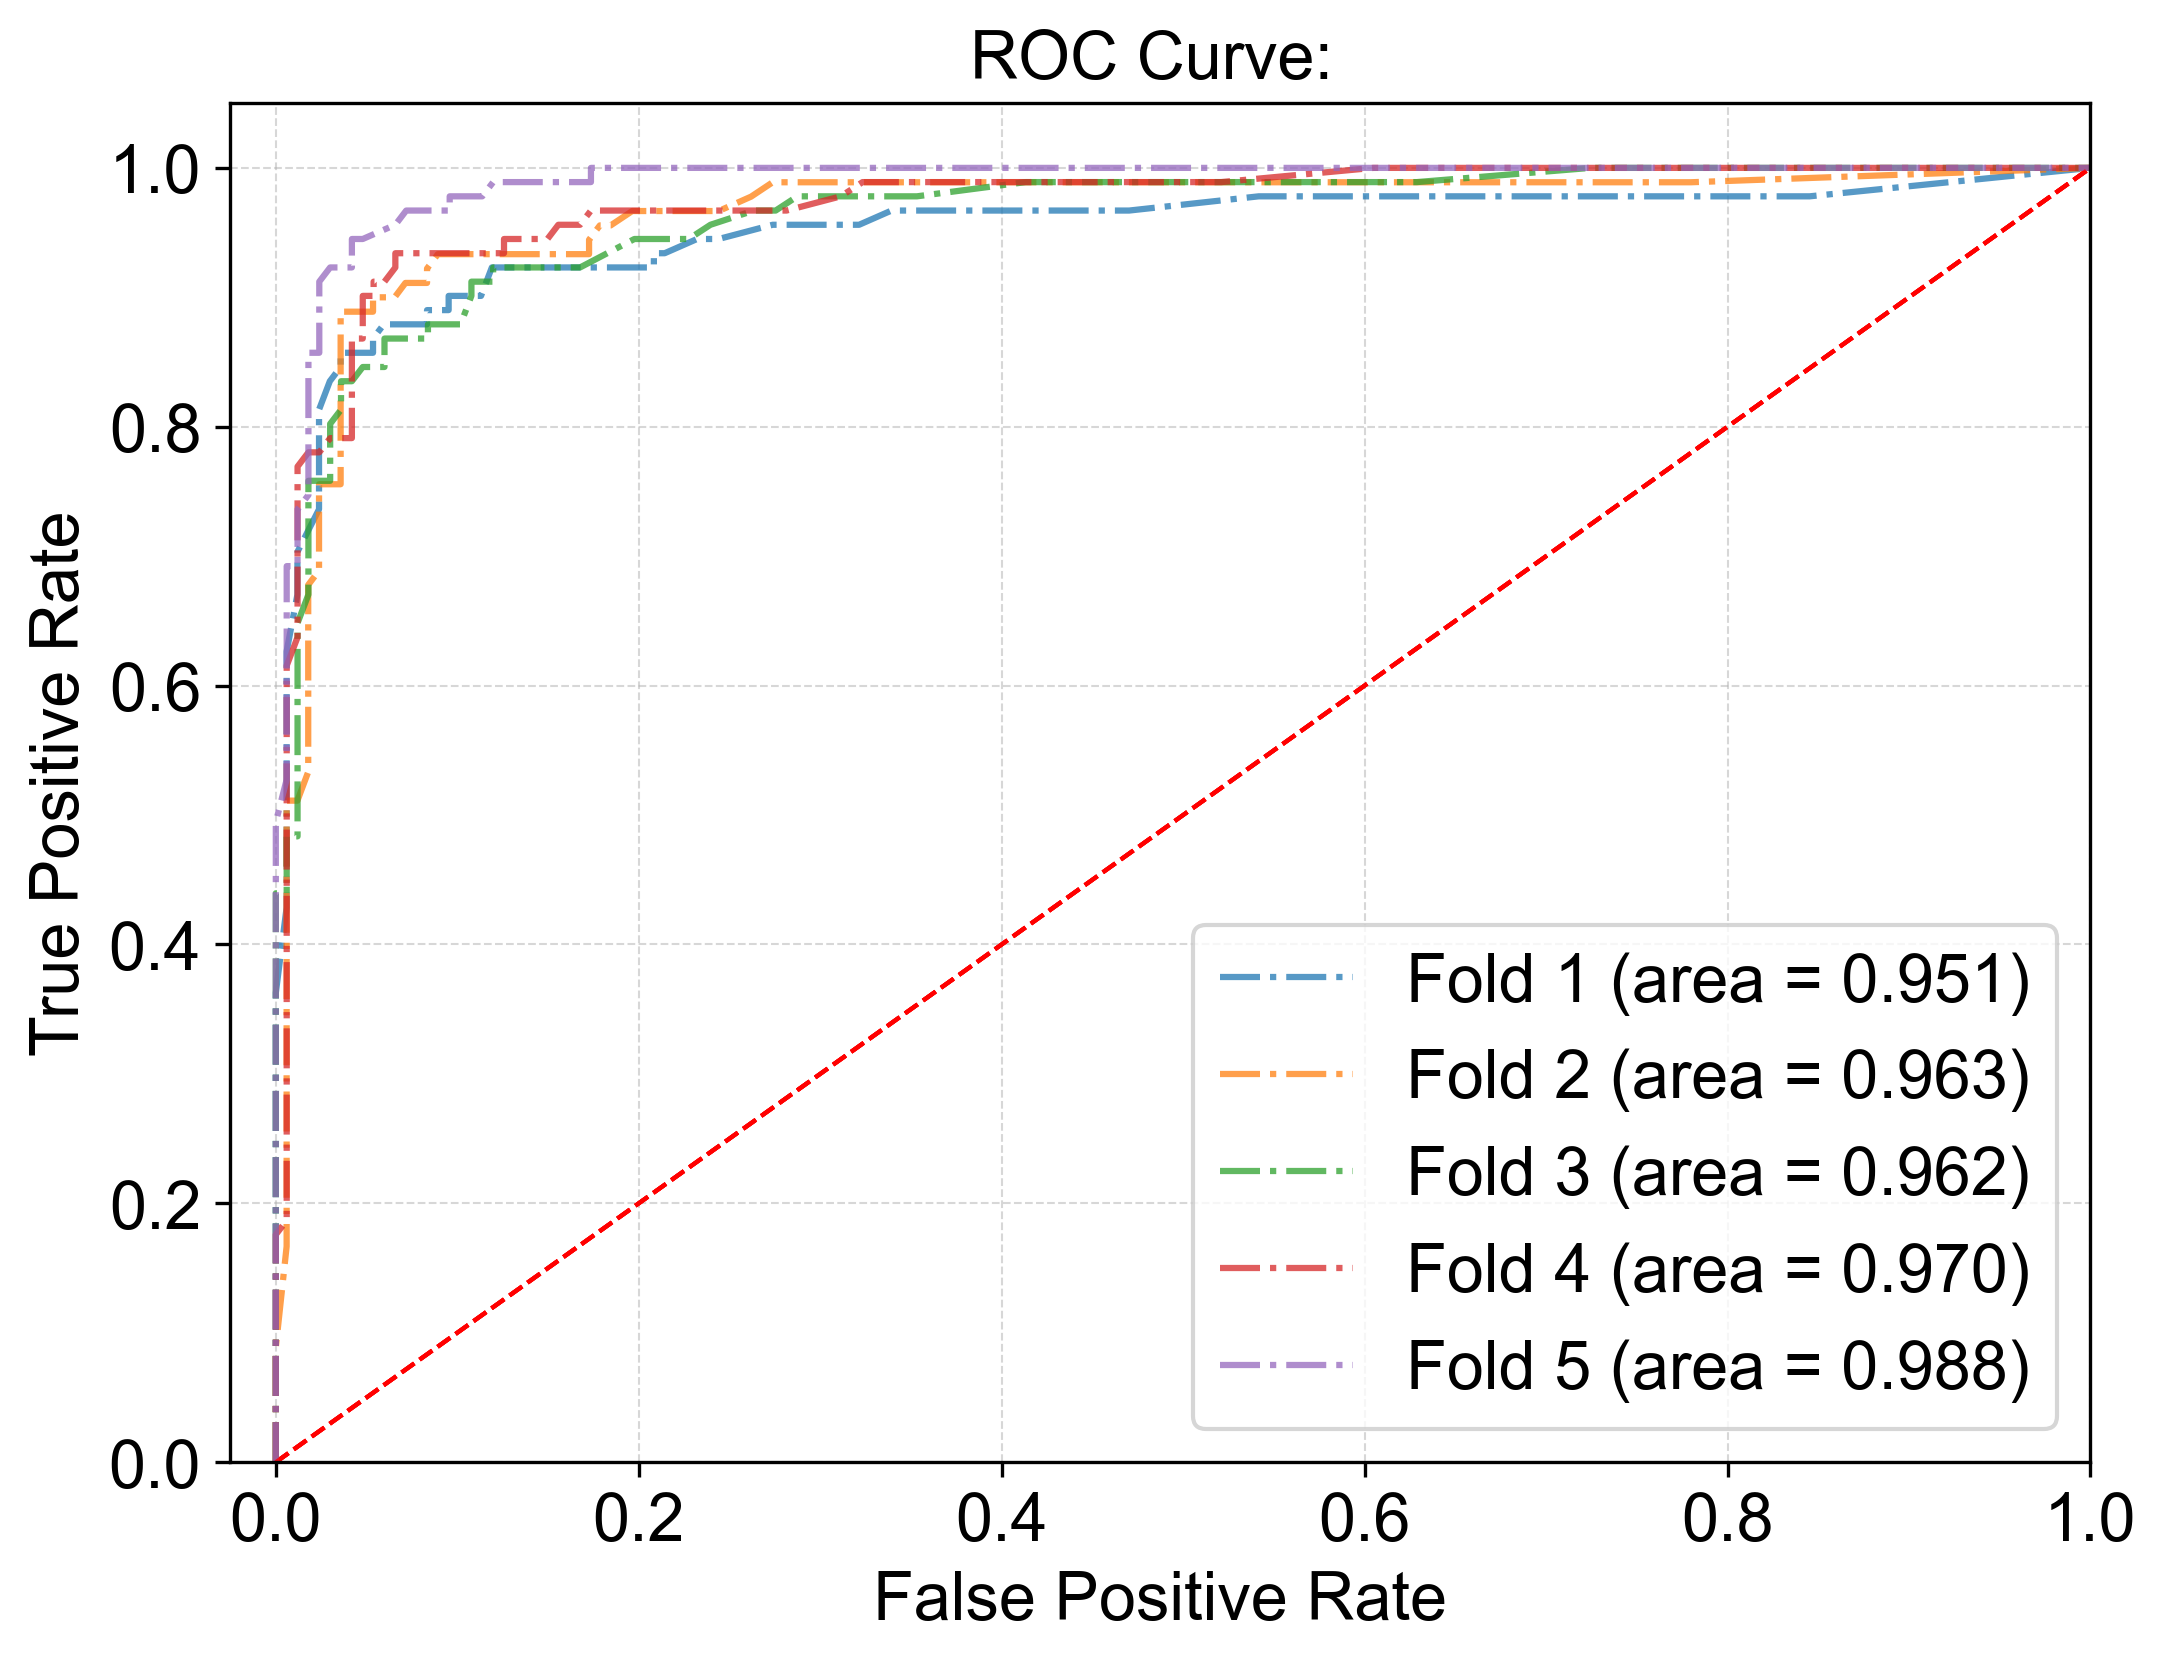

{'accuracy': 0.9264254287510101,
 'f1-score': 0.8935460691094865,
 'mcc': 0.8379197060856326,
 'roc_auc': 0.9669949030075206,
 'recall': 0.8800000000000001,
 'accuracy_std': 0.015041145427366974,
 'f1-score_std': 0.021979030673771986,
 'mcc_std': 0.033056822318482615,
 'roc_auc_std': 0.012200304280384147,
 'recall_std': 0.026076809620810618}

In [14]:
fold5(rf,X,y)

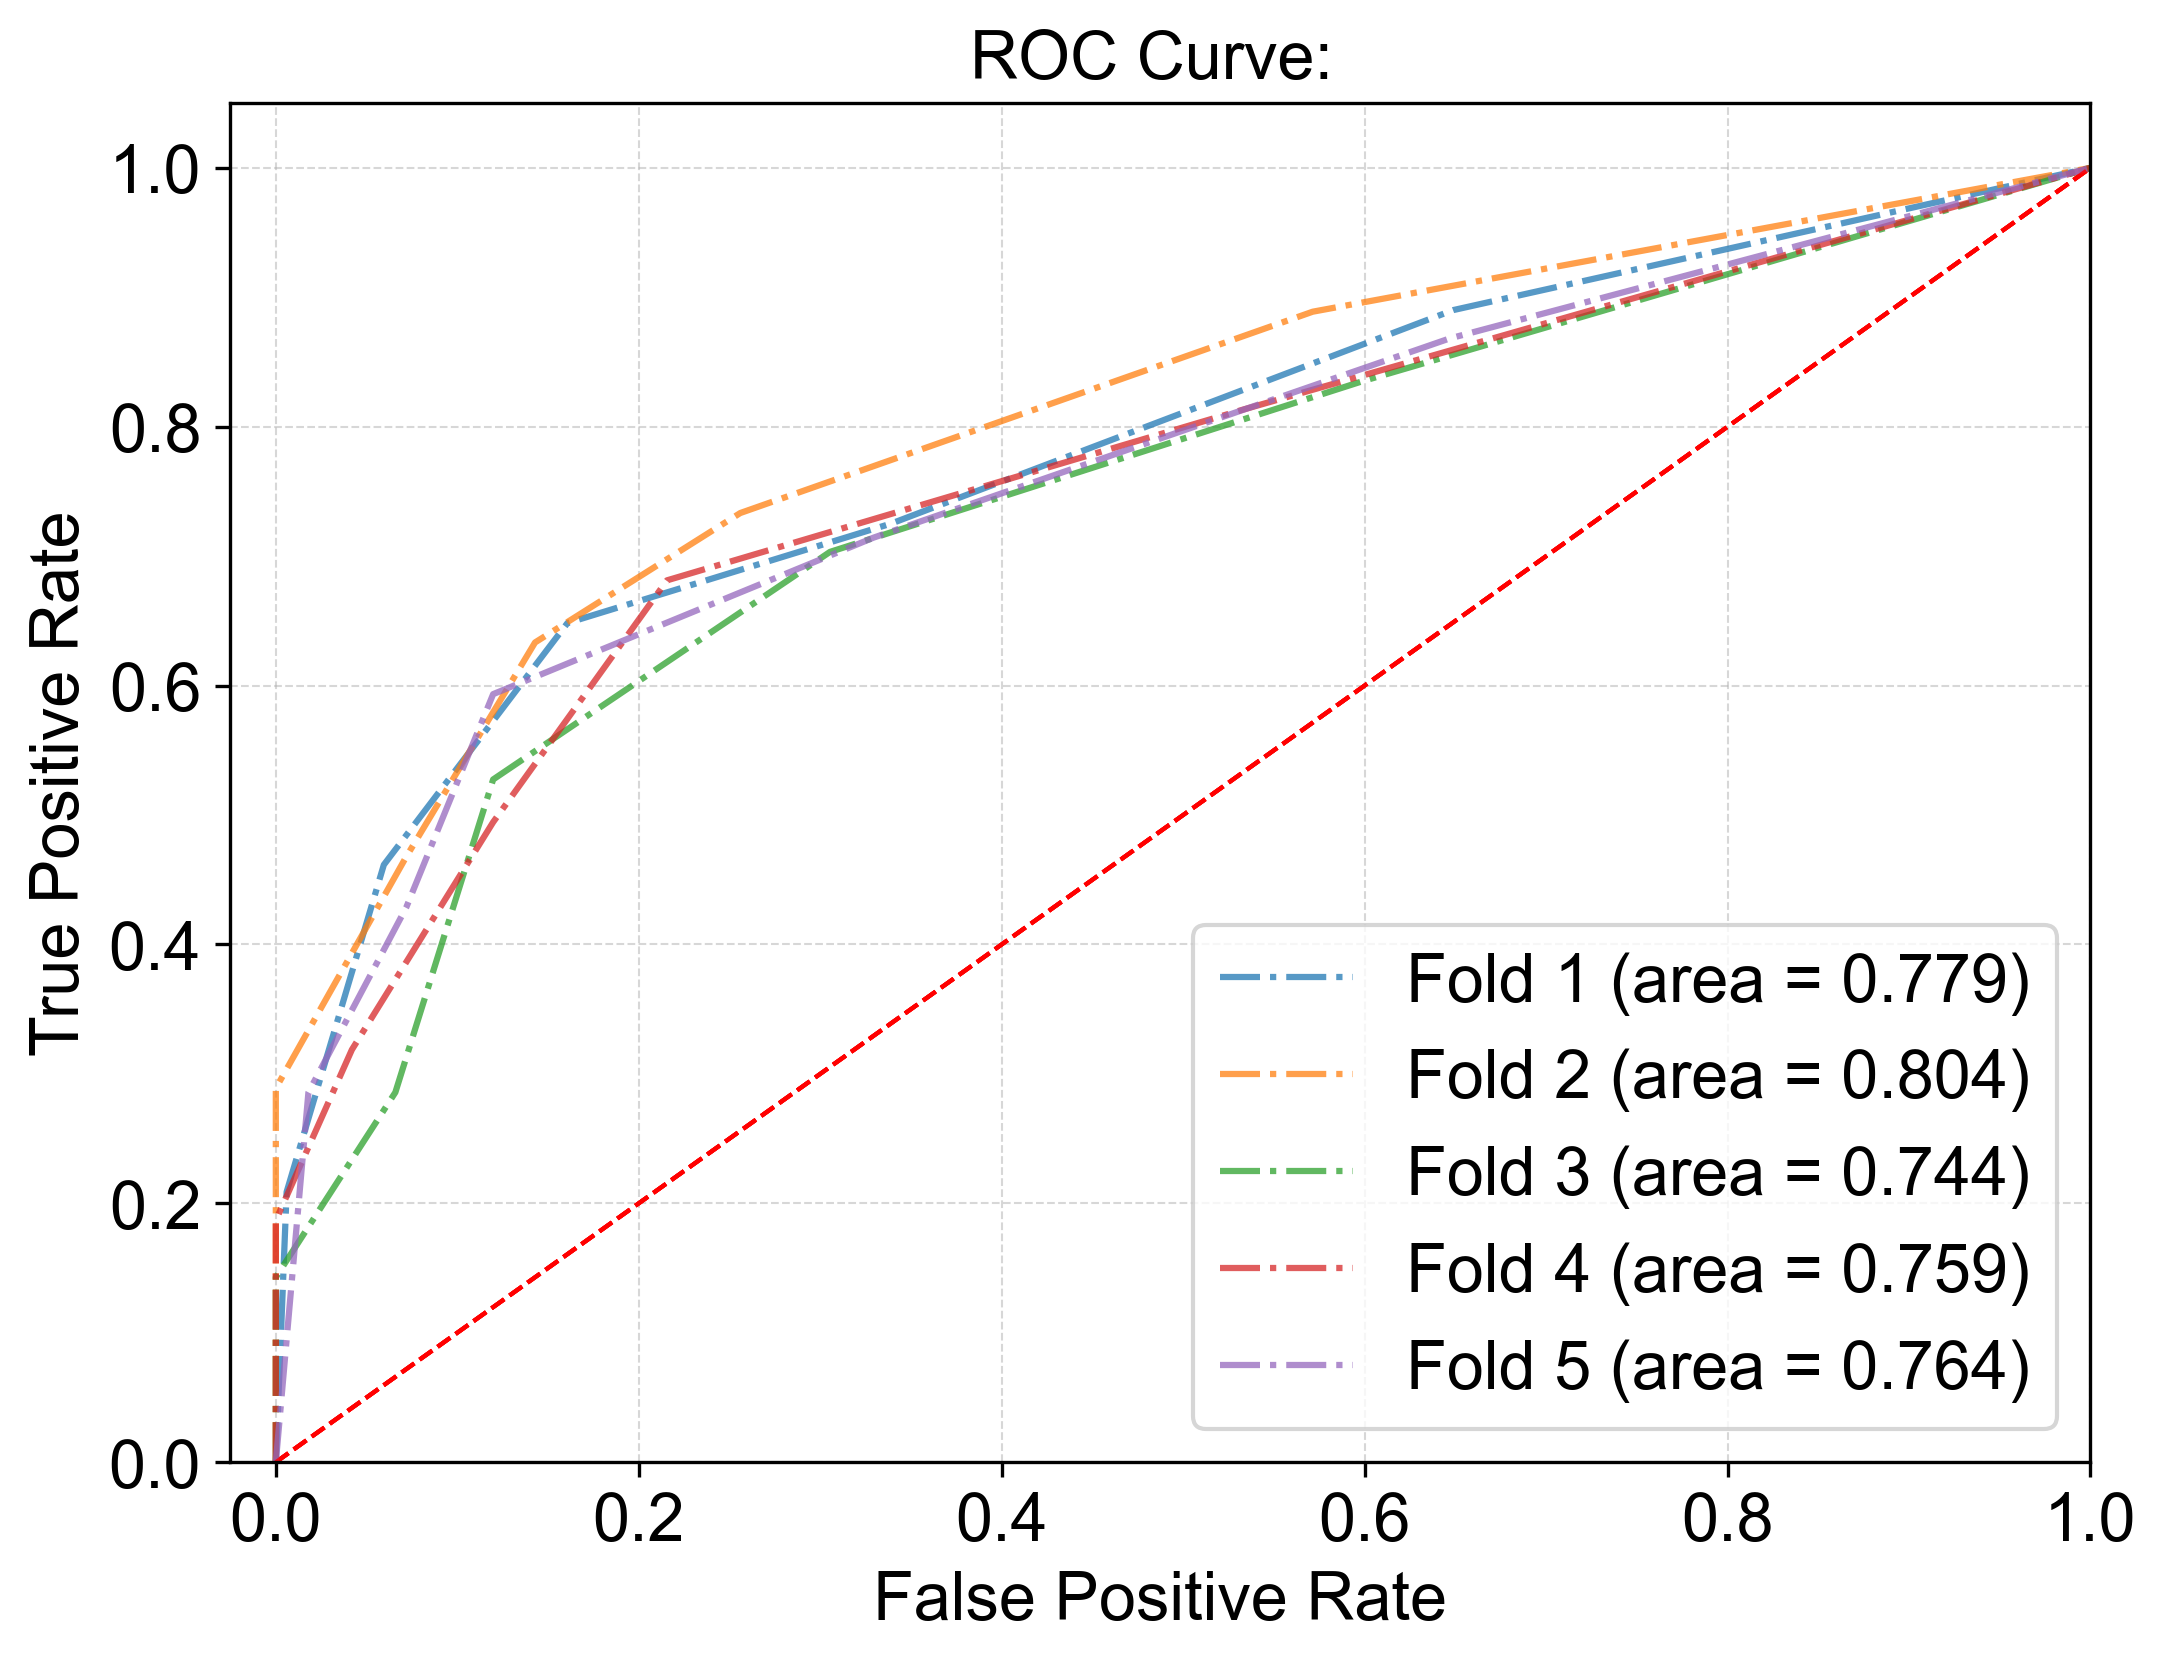

{'accuracy': 0.7660680614168986,
 'f1-score': 0.633715089941505,
 'mcc': 0.47060632982399875,
 'roc_auc': 0.7702310941521805,
 'recall': 0.578,
 'accuracy_std': 0.013854011450854666,
 'f1-score_std': 0.03668063078350408,
 'mcc_std': 0.03669538510807167,
 'roc_auc_std': 0.020371147426736652,
 'recall_std': 0.06013318551349164}

In [15]:
fold5(kn,X,y)

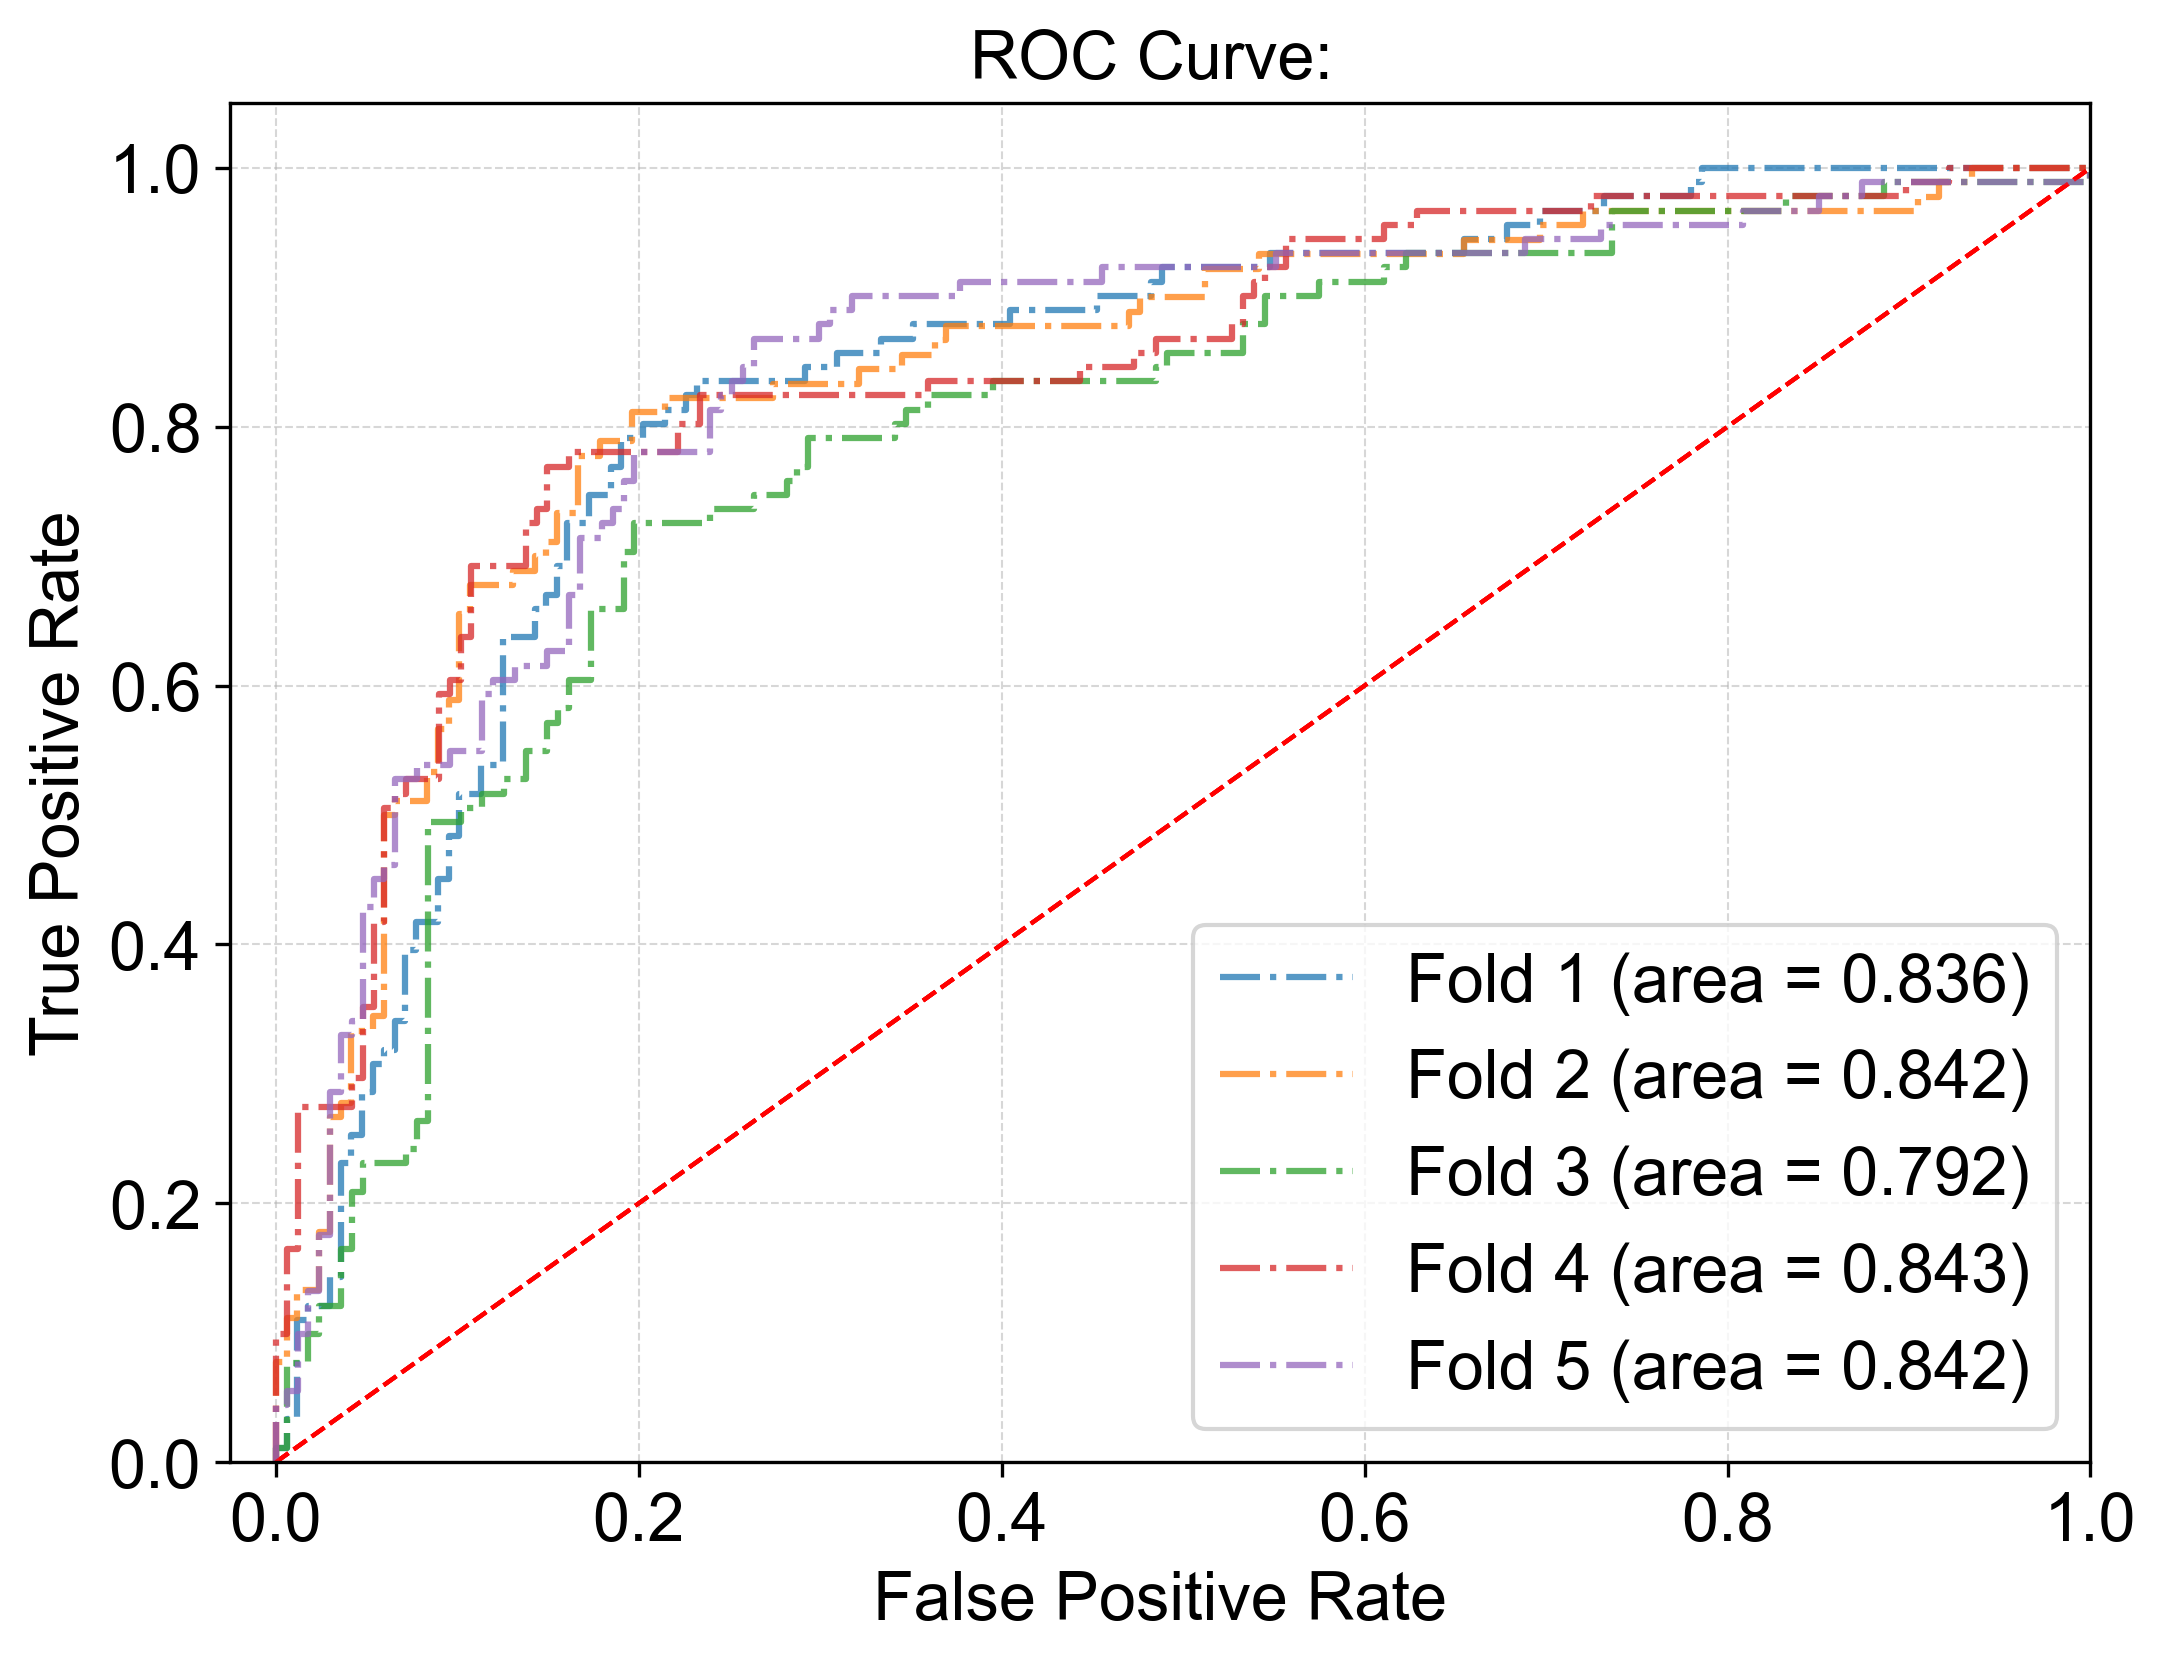

{'accuracy': 0.7622010715033971,
 'f1-score': 0.6441523428032654,
 'mcc': 0.49583095510727515,
 'roc_auc': 0.8310683133993656,
 'recall': 0.6719999999999999,
 'accuracy_std': 0.020137036116026318,
 'f1-score_std': 0.10854316572437306,
 'mcc_std': 0.07927435130846779,
 'roc_auc_std': 0.019569182420413493,
 'recall_std': 0.2188515478583599}

In [16]:
fold5(mlp,X,y)

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


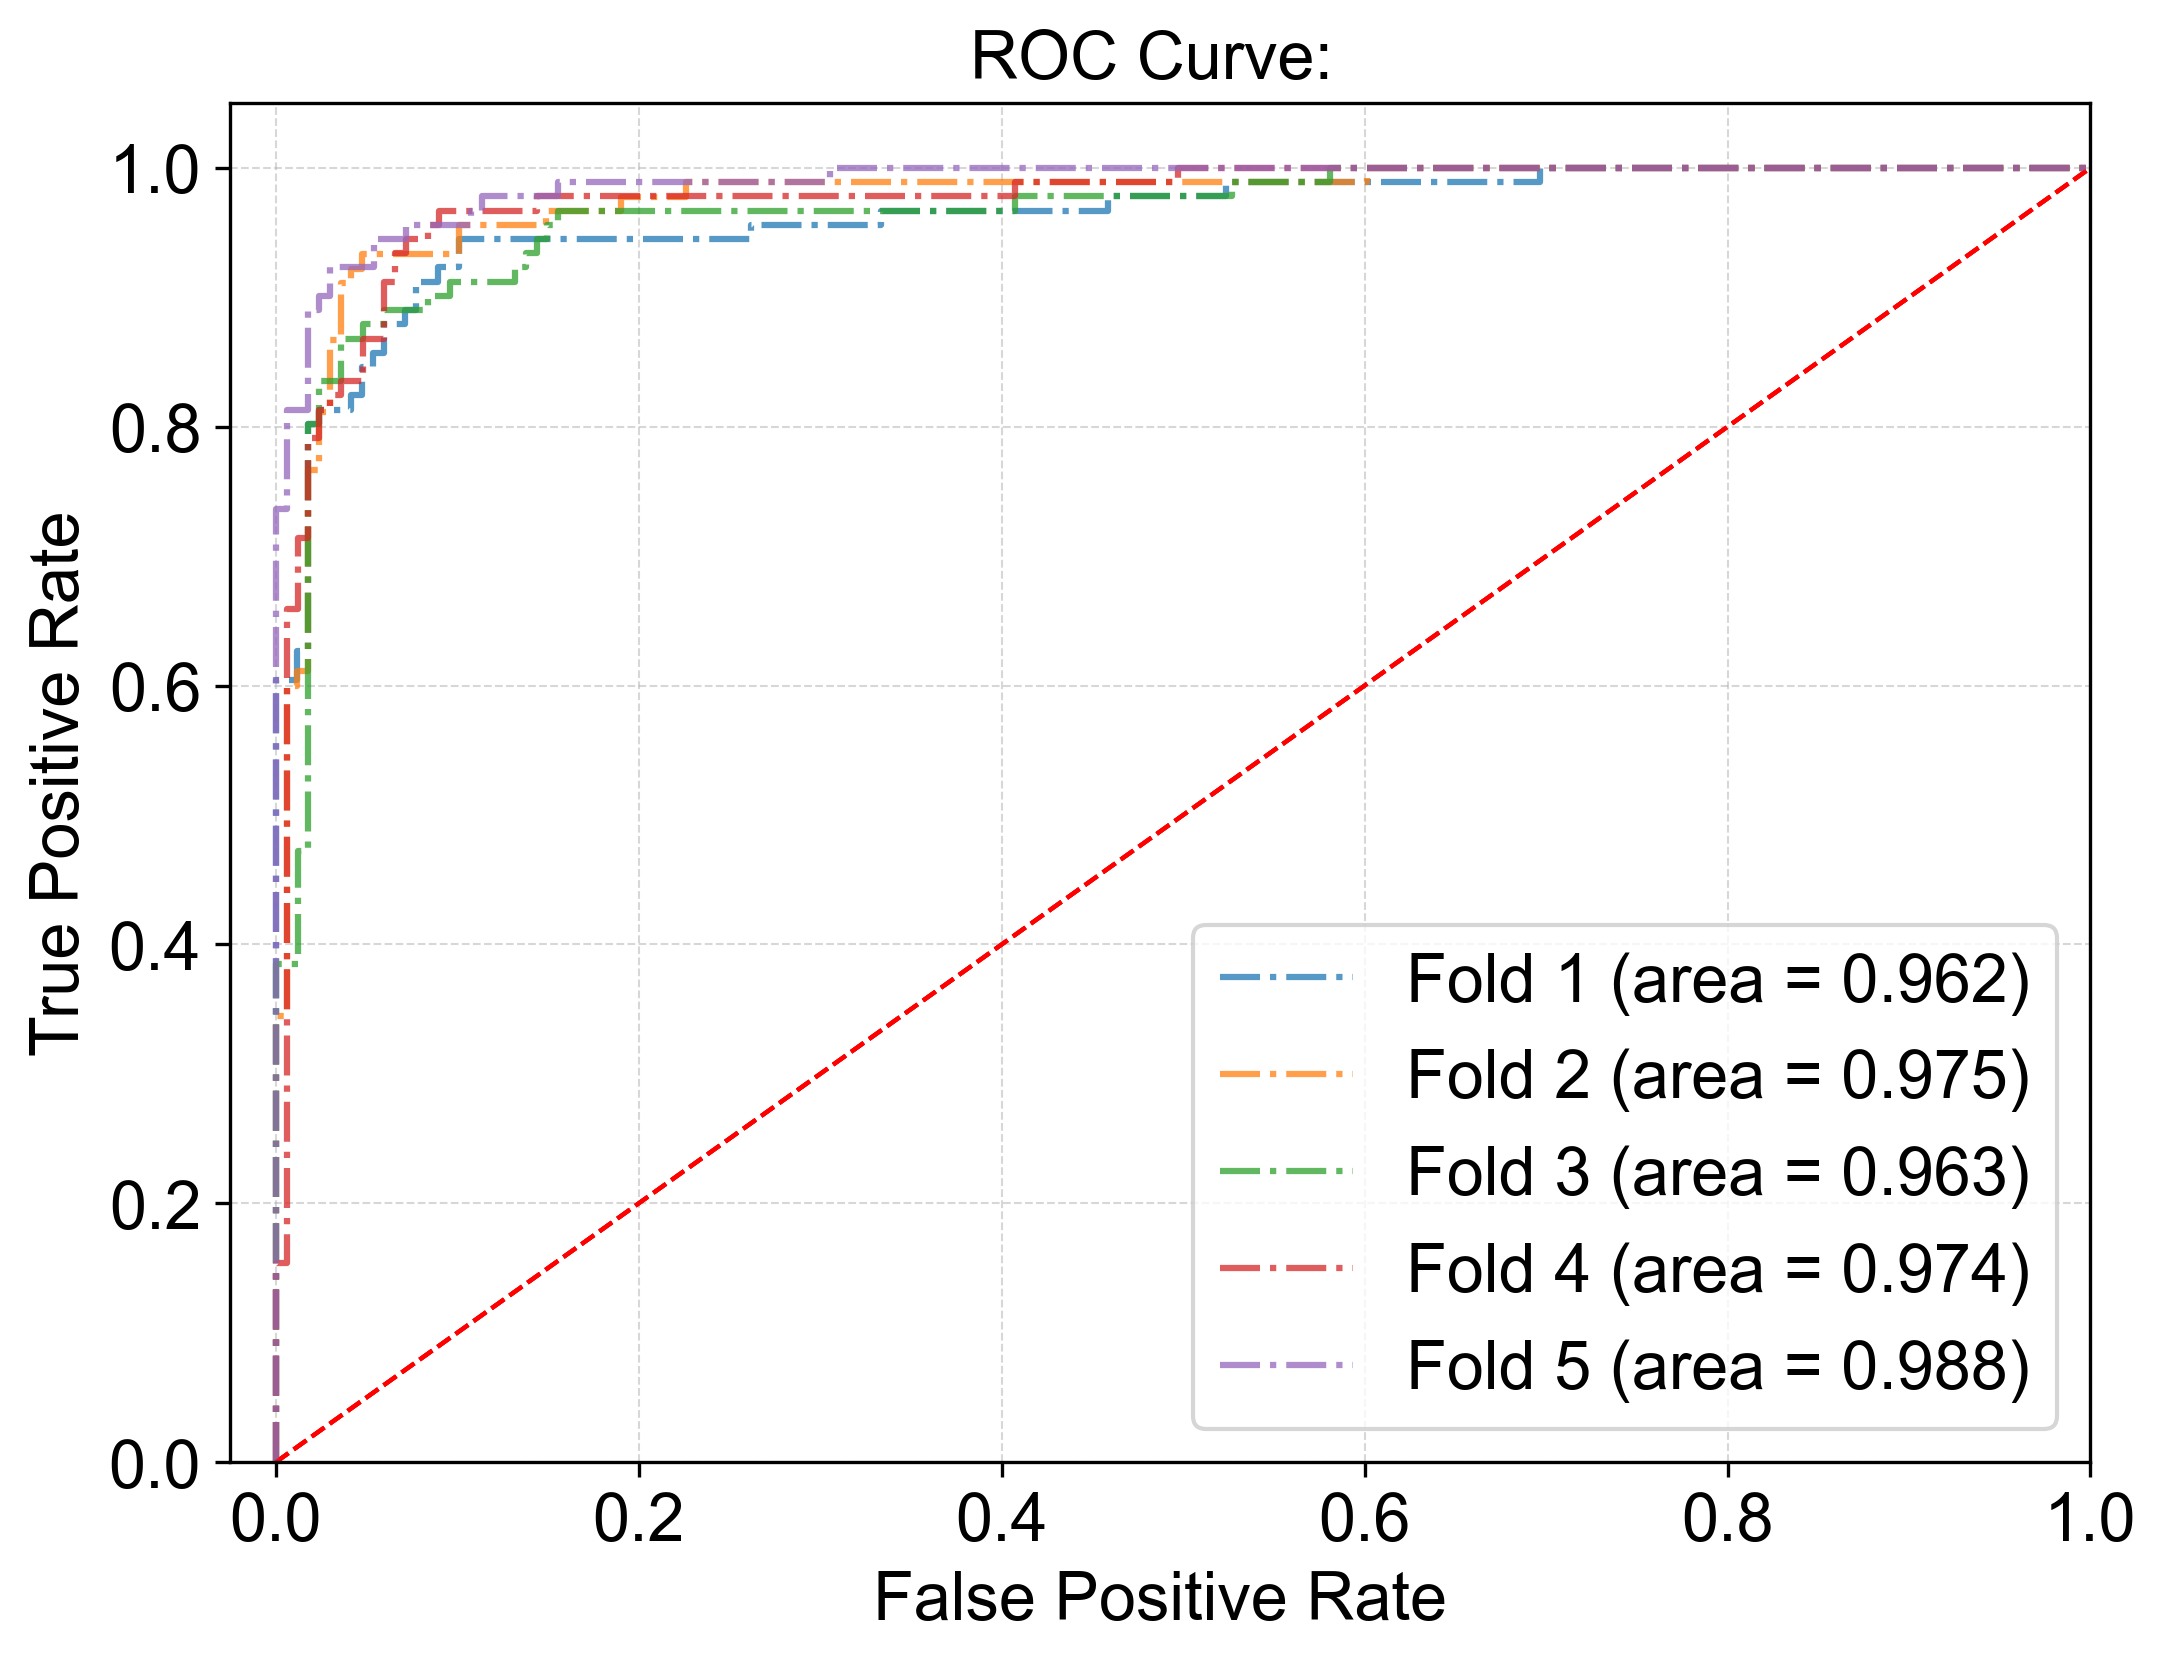

{'accuracy': 0.9279758163479093,
 'f1-score': 0.8953886028604201,
 'mcc': 0.8415553754576667,
 'roc_auc': 0.9724487019333041,
 'recall': 0.8779999999999999,
 'accuracy_std': 0.014751598004265839,
 'f1-score_std': 0.021058165109312656,
 'mcc_std': 0.03200913917484332,
 'roc_auc_std': 0.009271865241826395,
 'recall_std': 0.027129319932501096}

In [17]:
fold5(lgbm,X,y)

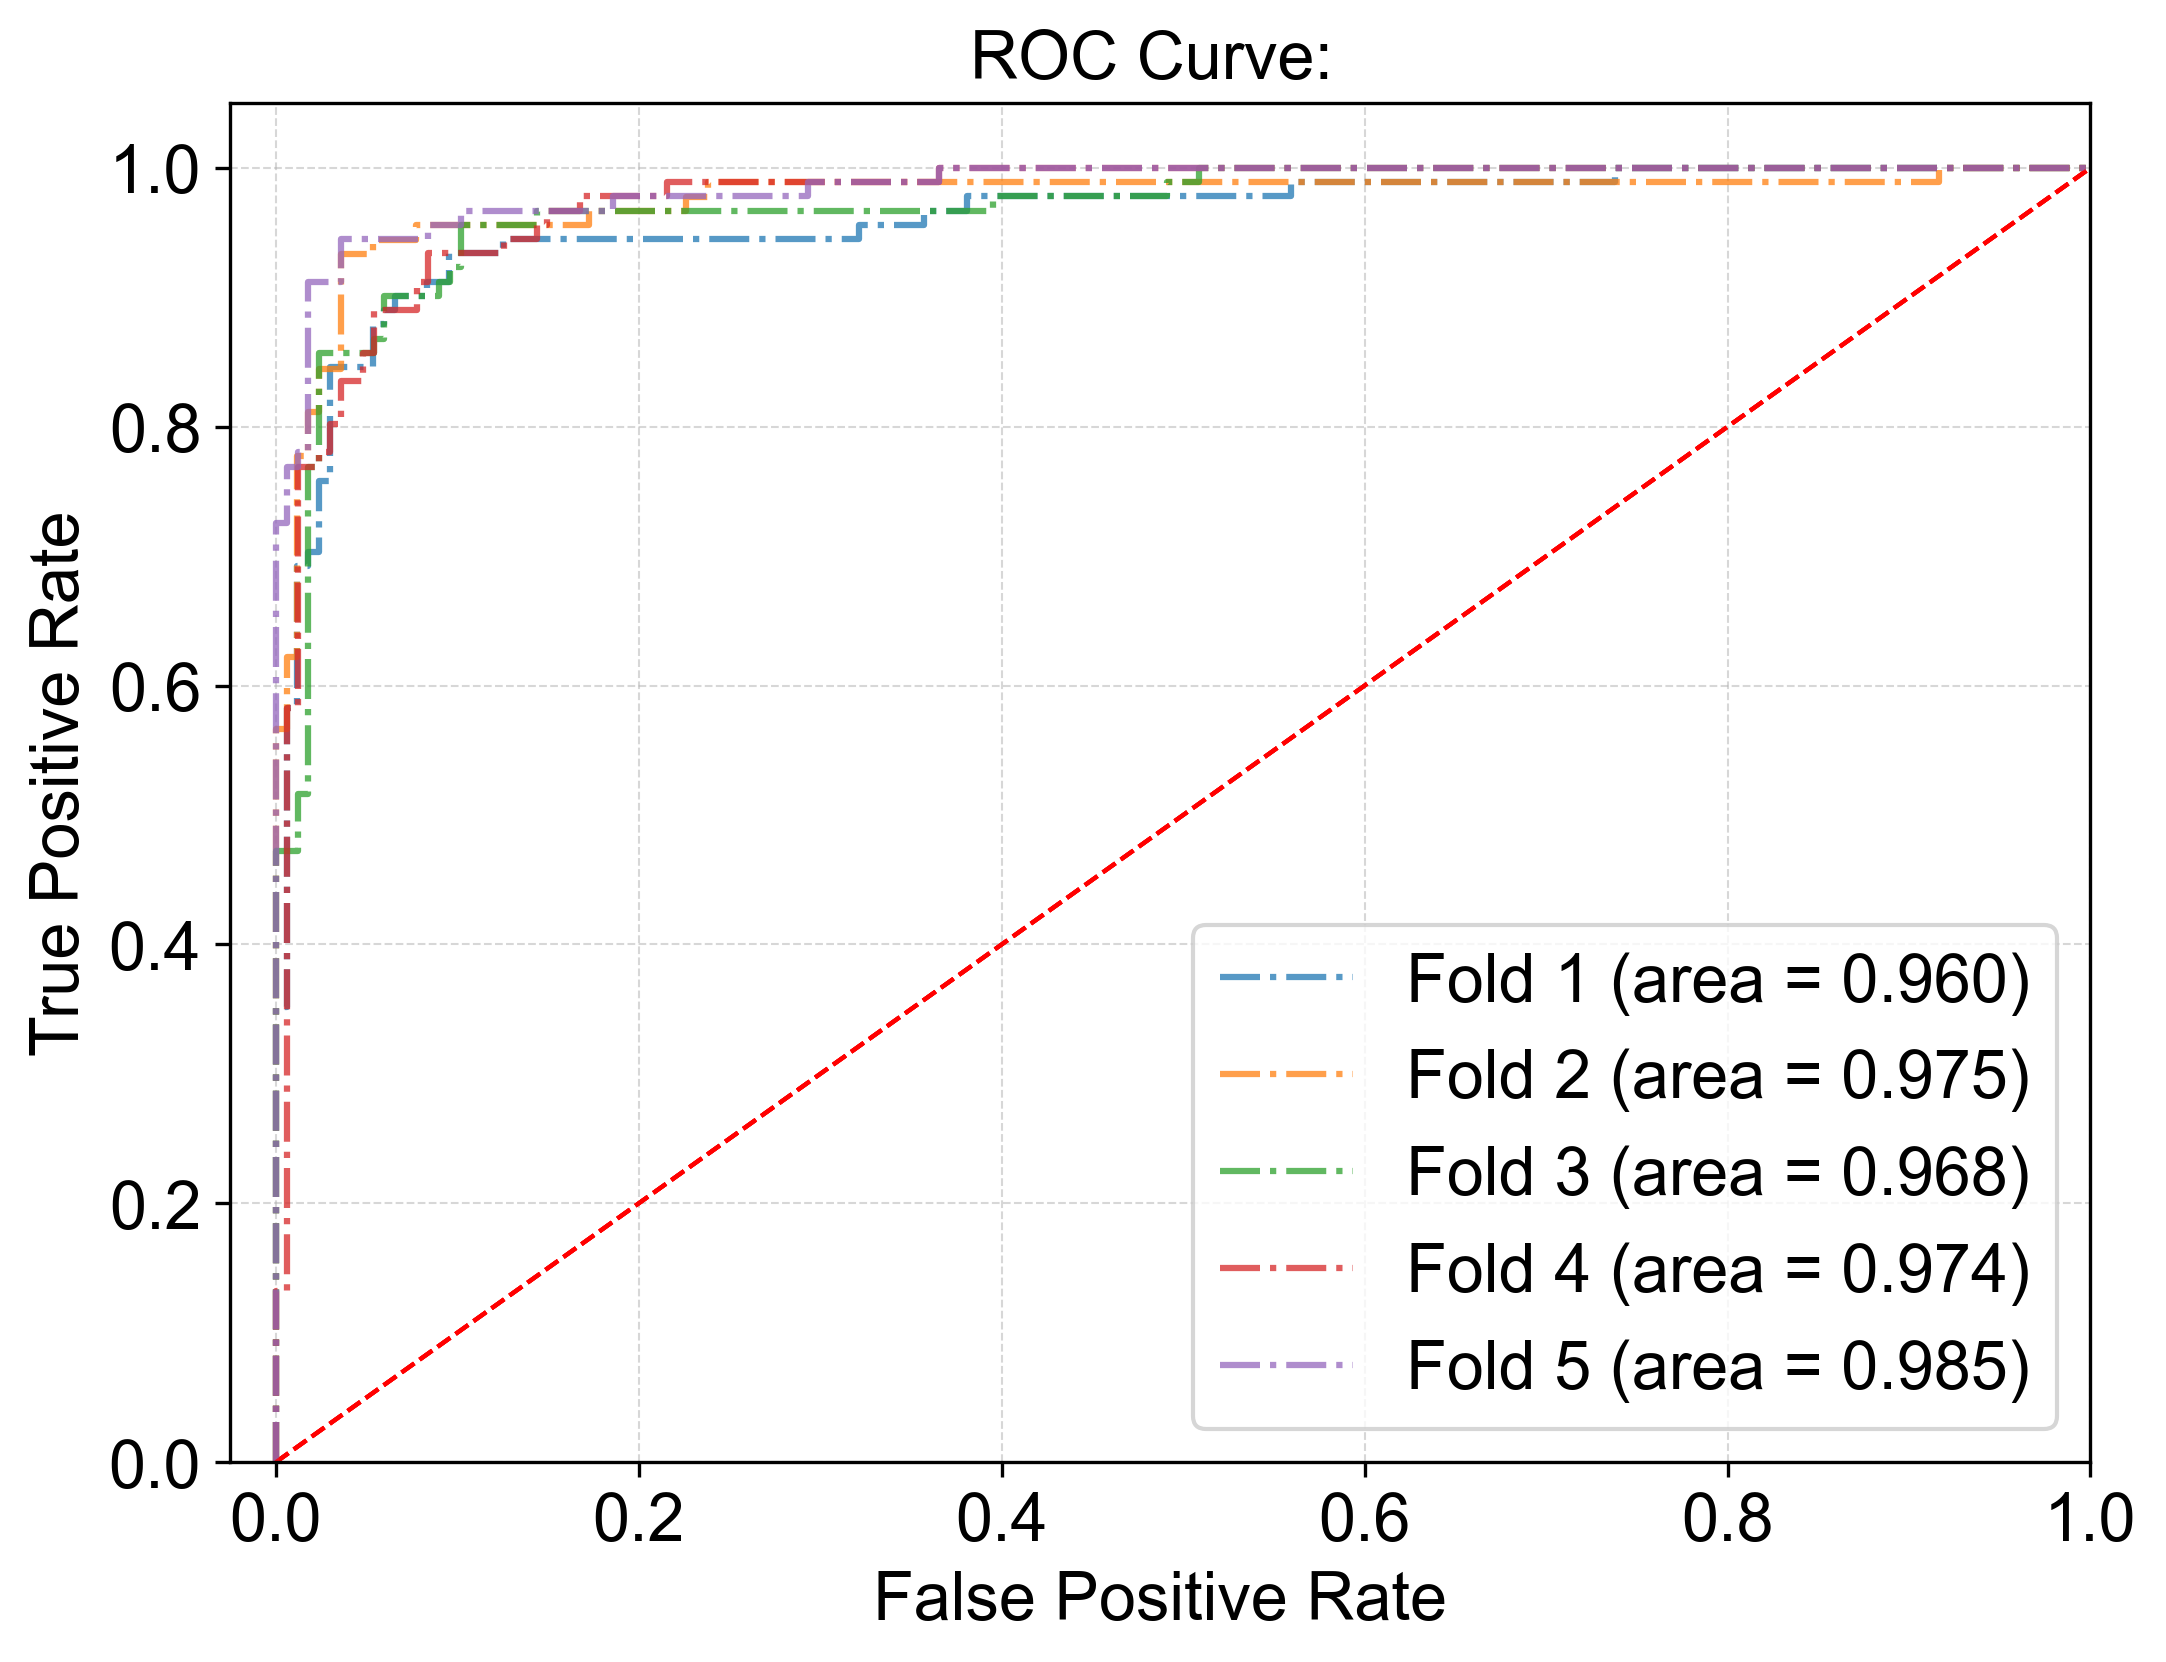

{'accuracy': 0.9318428062614108,
 'f1-score': 0.9005809776885039,
 'mcc': 0.8497788443039266,
 'roc_auc': 0.9721484512224461,
 'recall': 0.8799999999999999,
 'accuracy_std': 0.013519756988997152,
 'f1-score_std': 0.020035352350473275,
 'mcc_std': 0.029794085365138705,
 'roc_auc_std': 0.008214676736477513,
 'recall_std': 0.027568097504180468}

In [18]:
fold5(xb,X,y)

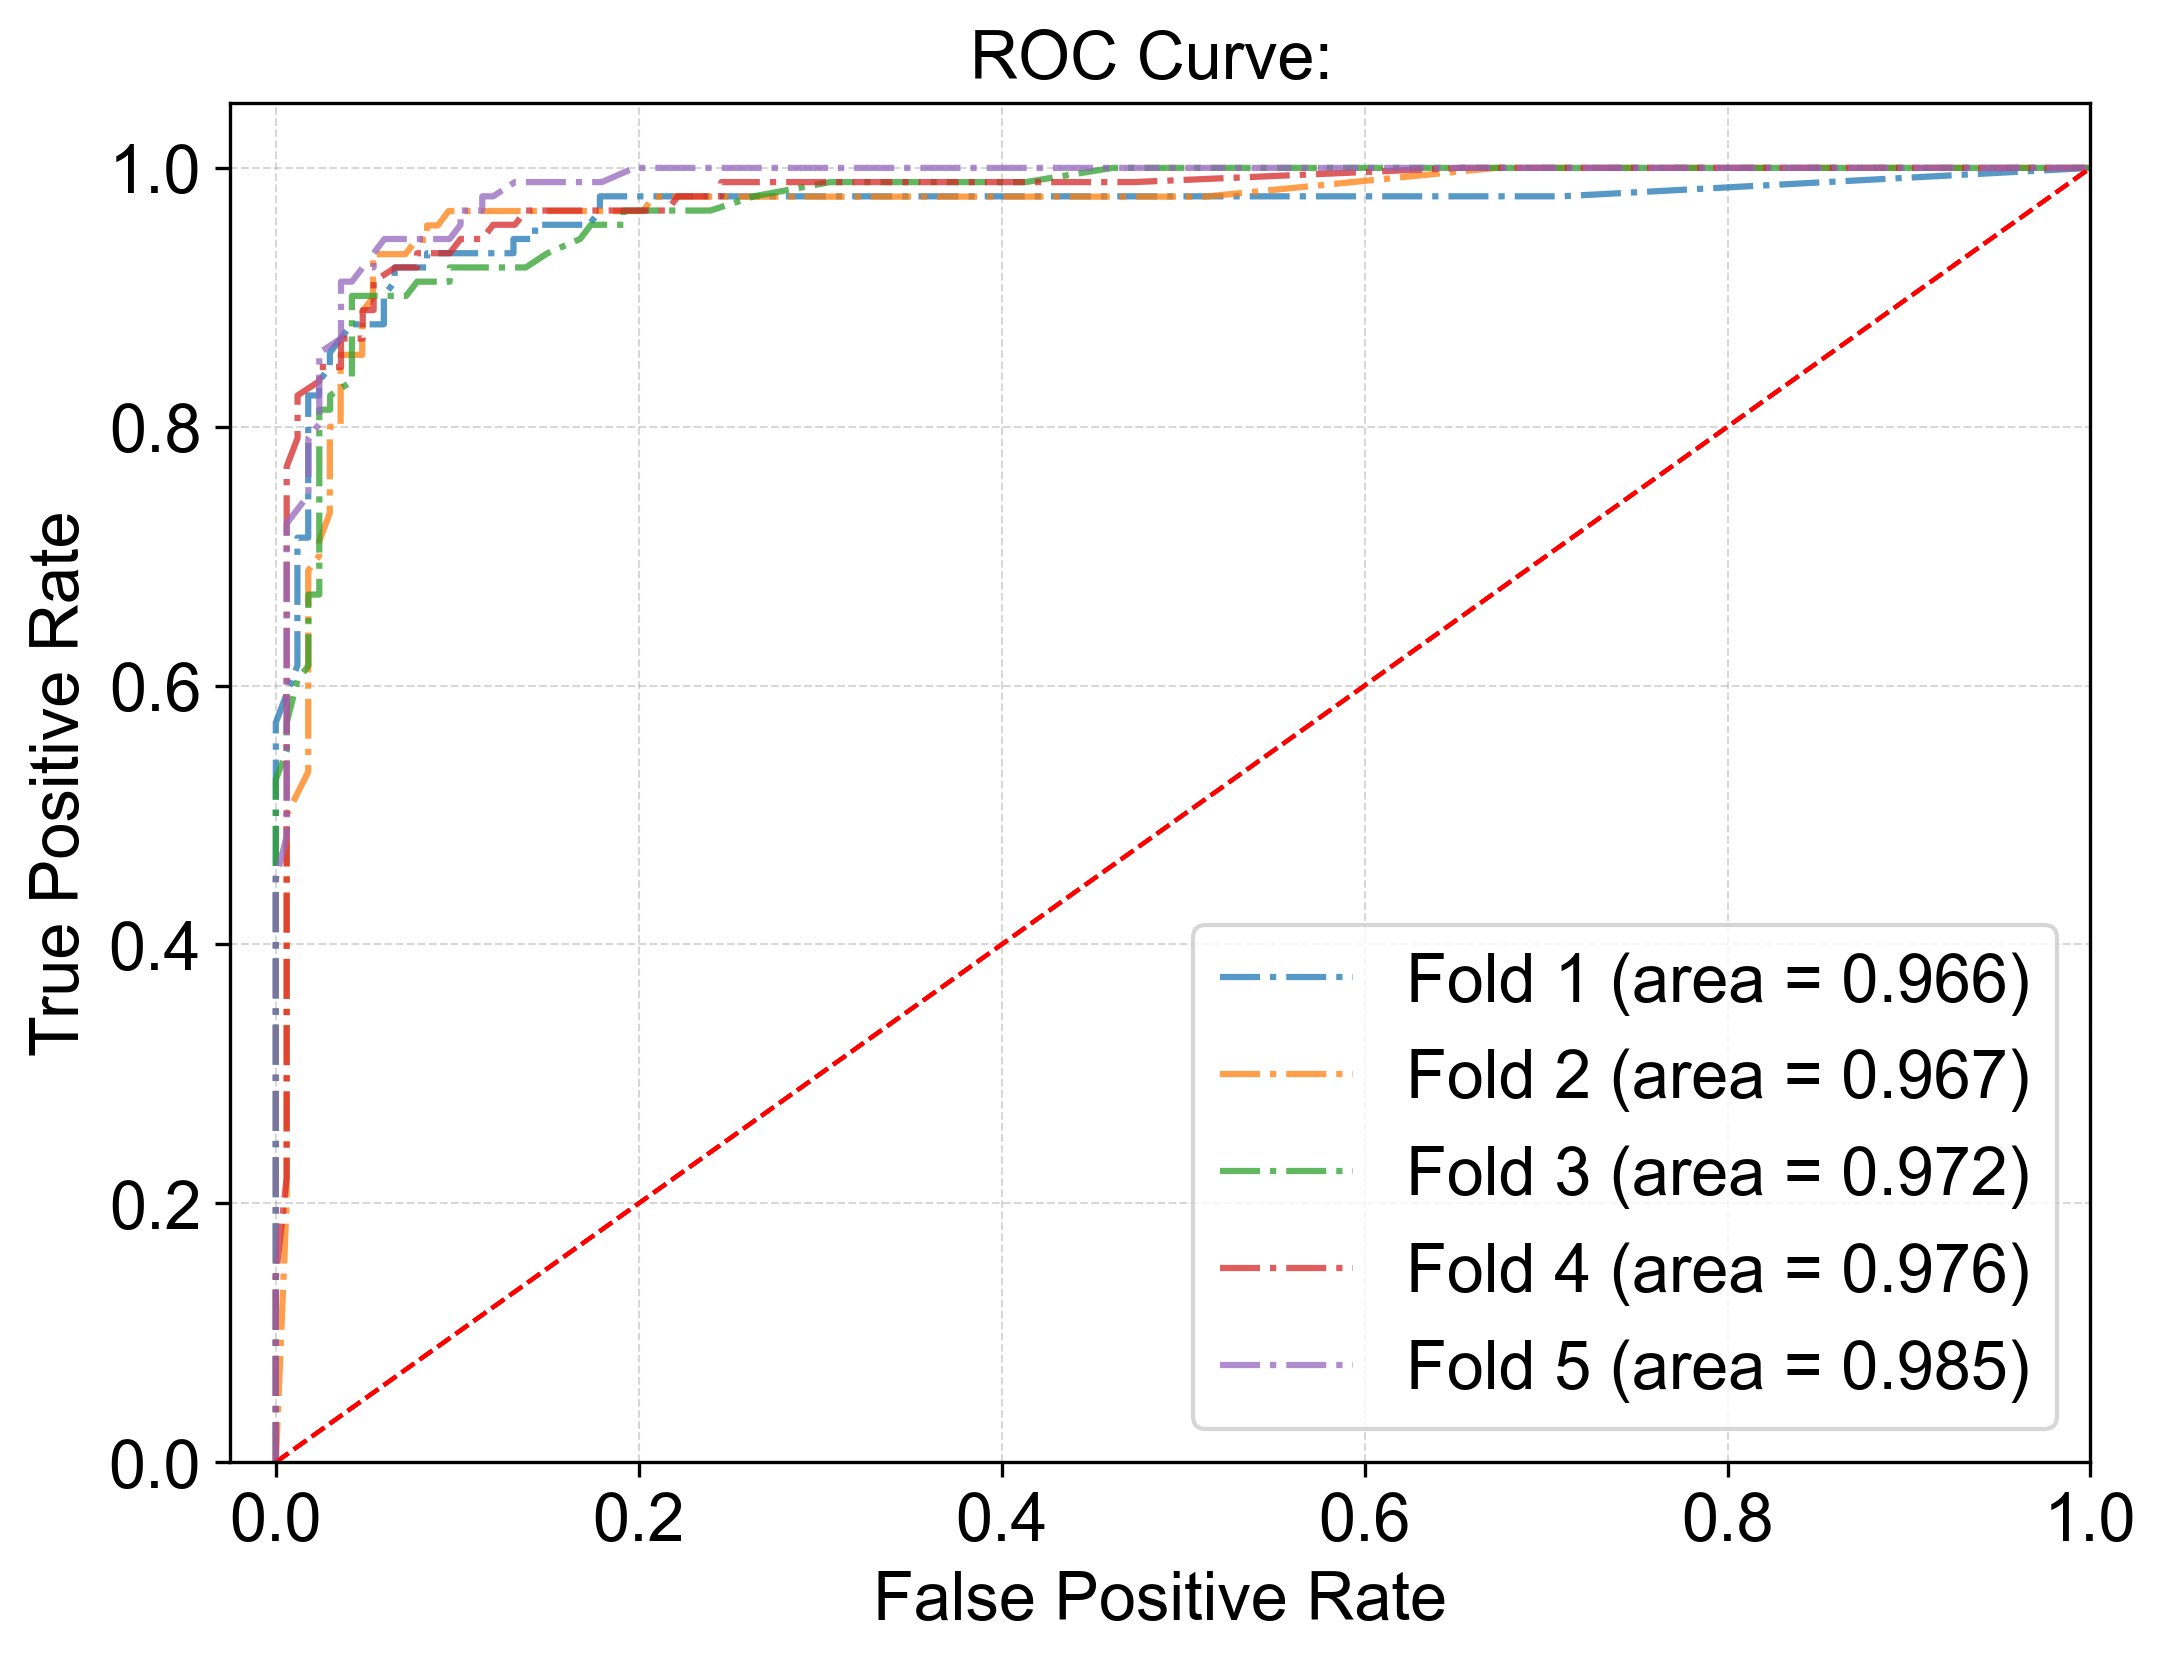

{'accuracy': 0.9279638442429141,
 'f1-score': 0.8970038703021153,
 'mcc': 0.8421959503944196,
 'roc_auc': 0.9731013304805007,
 'recall': 0.8940000000000001,
 'accuracy_std': 0.008692134714197343,
 'f1-score_std': 0.014188016683231646,
 'mcc_std': 0.019657288565087104,
 'roc_auc_std': 0.007059189379028912,
 'recall_std': 0.029393876913398165}

In [19]:
fold5(ext,X,y)

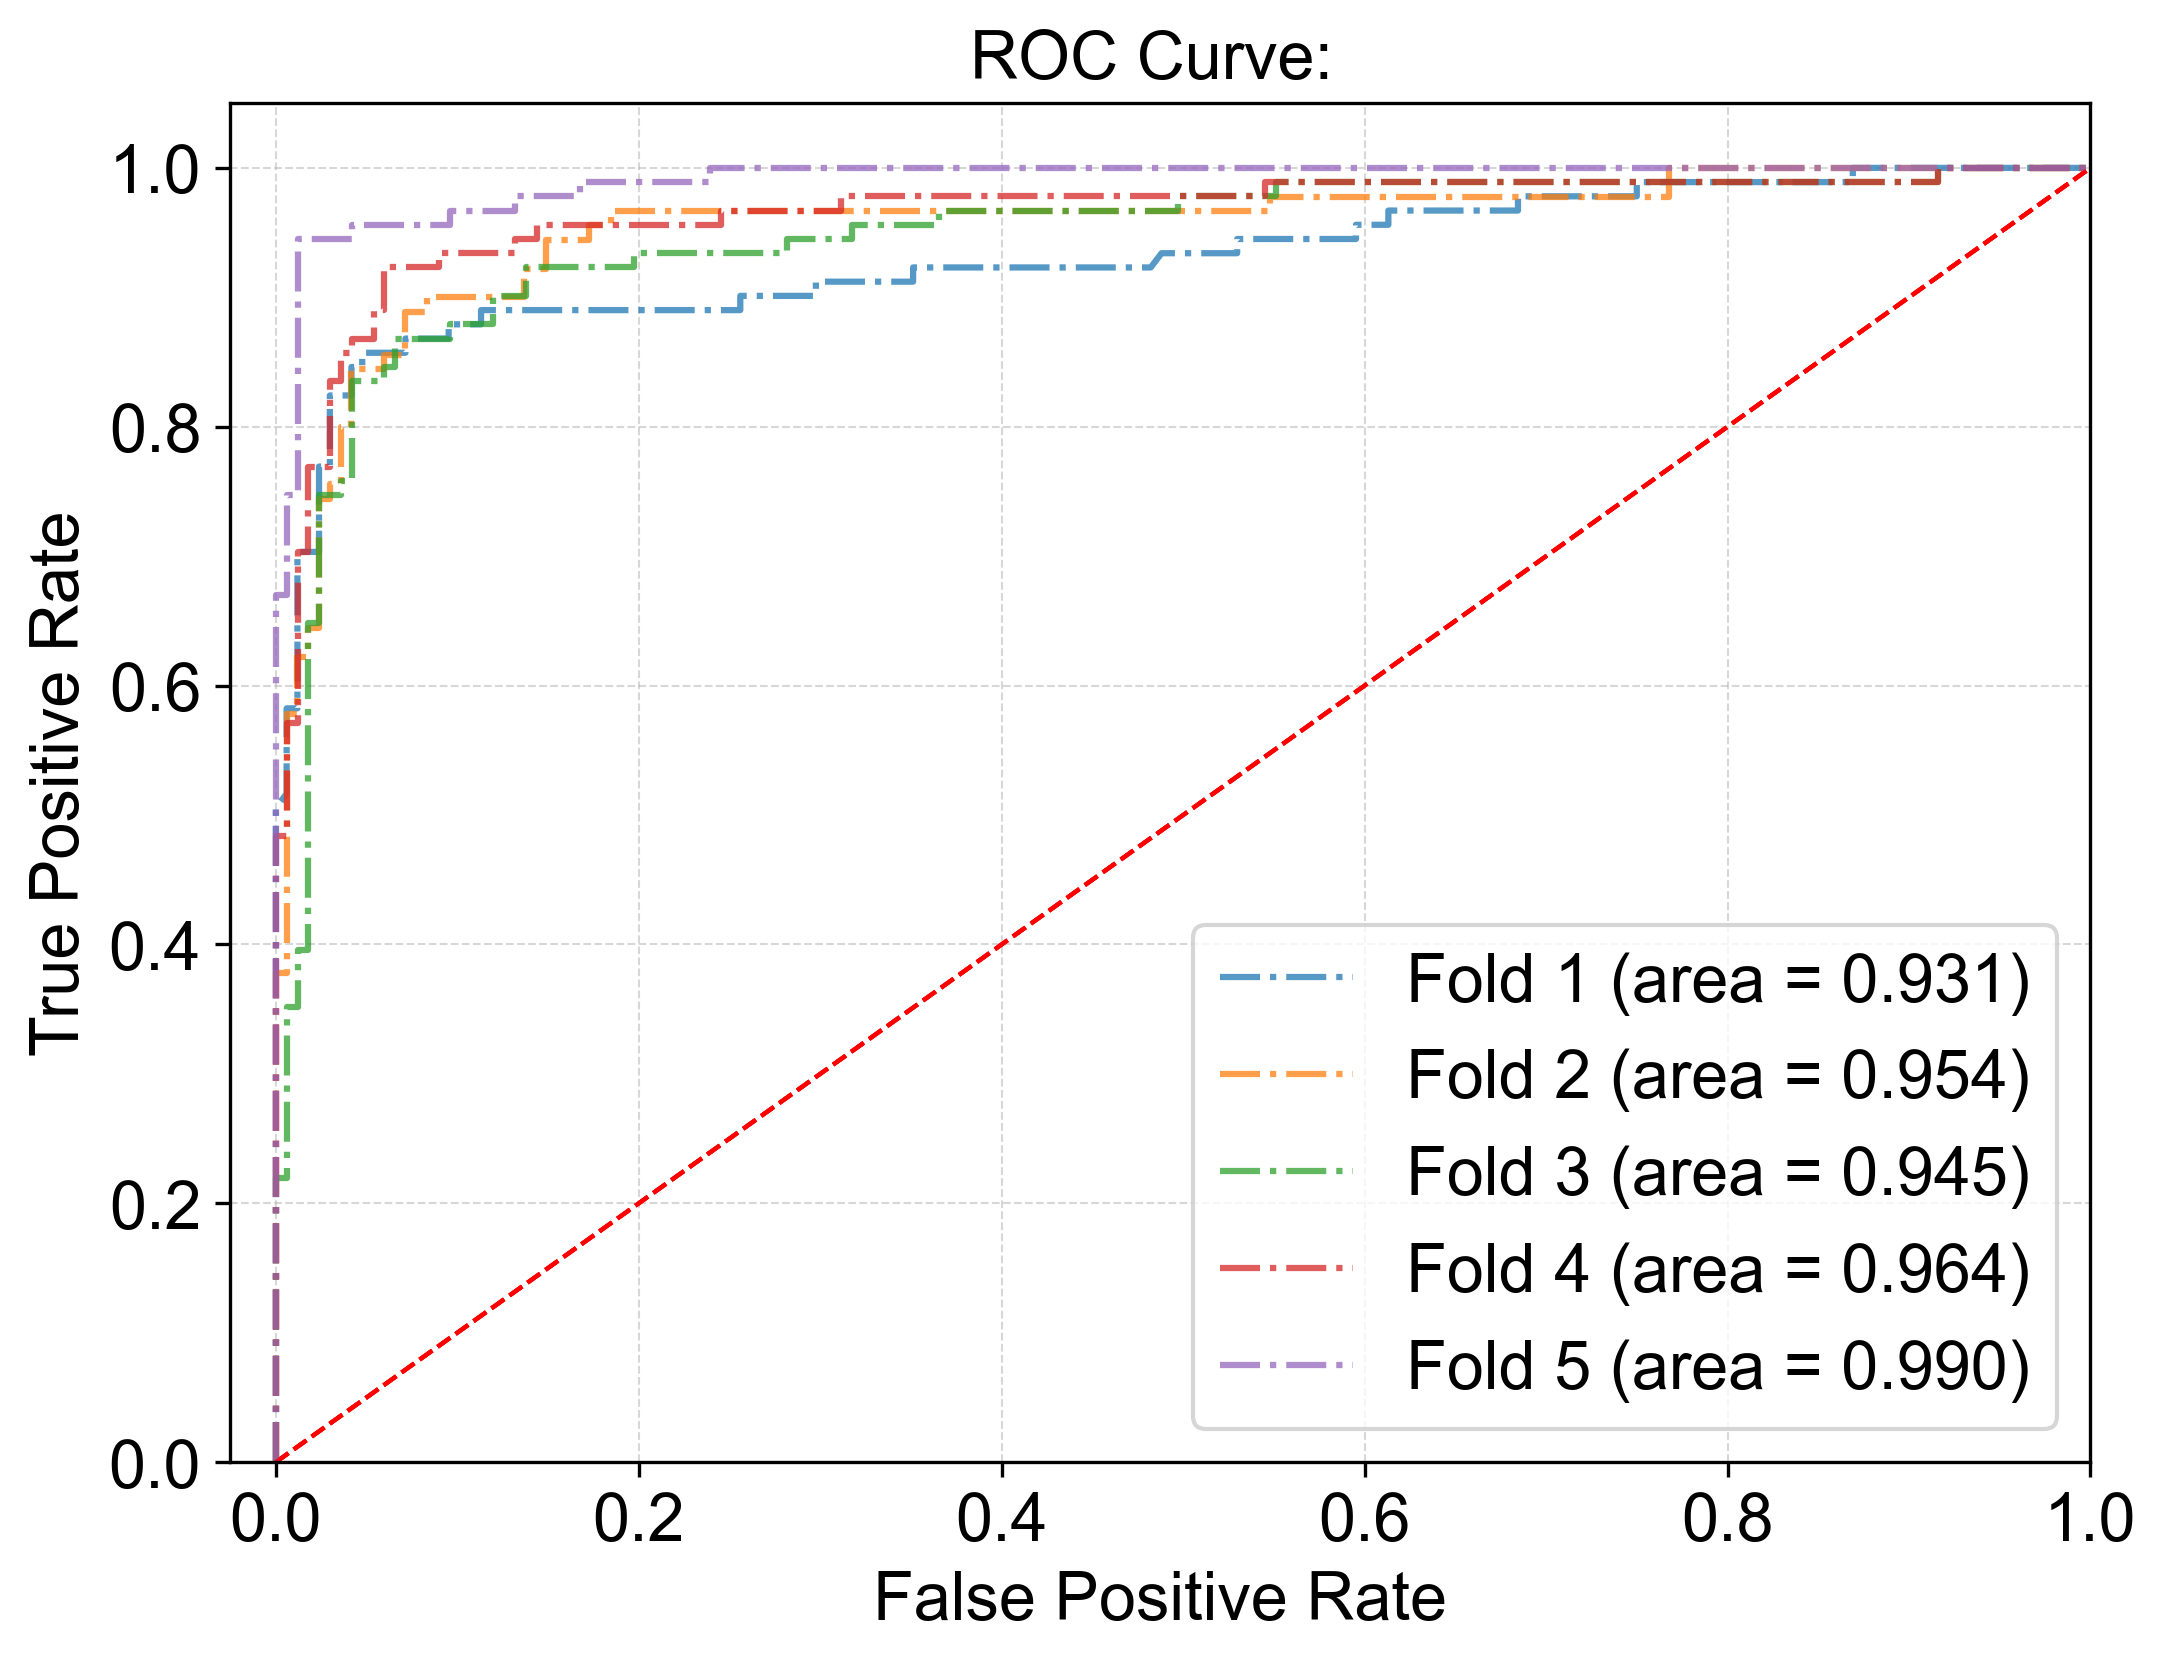

{'accuracy': 0.9271976295232107,
 'f1-score': 0.8923934157255902,
 'mcc': 0.8389354450242479,
 'roc_auc': 0.9567781087049692,
 'recall': 0.86,
 'accuracy_std': 0.021806391888336028,
 'f1-score_std': 0.032840592254219605,
 'mcc_std': 0.04853219515359866,
 'roc_auc_std': 0.019818871377774265,
 'recall_std': 0.039496835316263}

In [20]:
fold5(gbc,X,y)

In [21]:
df1 = pd.concat([X,y],axis=1)

In [22]:
from joblib import Parallel, delayed
from time import time
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold

def init_population(n, c):
    return np.array([[math.ceil(e) for e in pop] for pop in (np.random.rand(n, c) - 0.5)]), np.zeros((2, c)) - 1

def single_point_crossover(population):
    r, c = population.shape
    n = np.random.randint(1, c)         
    for i in range(0, r, 2):                
        population[i], population[i+1] = np.append(population[i][0:n], population[i+1][n:c]), np.append(population[i+1][0:n], population[i][n:c])        
    return population

def flip_mutation(population):
    return population.max() - population

def random_selection(population):
    r = population.shape[0]
    new_population = population.copy()    
    for i in range(r):        
        new_population[i] = population[np.random.randint(0, r)]
    return new_population

def predictive_model_cv(X, y, model, selected_features):
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = []
    # 5-fold CV
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index][selected_features], X.iloc[test_index][selected_features]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        mdl = model
        mdl.fit(X_train, y_train)
        y_pred = mdl.predict(X_test)
        score = accuracy_score(y_test, y_pred)
        scores.append(score)

    return np.mean(scores)

def individual_fitness_cv(individual, data, feature_list, target, model):

    selected_features = [feature_list[j] for j in range(individual.shape[0]) if individual[j] == 1]
    return predictive_model_cv(data[selected_features], data[target], model, selected_features)

def get_fitness_cv(data, feature_list, target, population, model):
    fitness = Parallel(n_jobs=-1)(delayed(individual_fitness_cv)(individual, data, feature_list, target, model) for individual in population)
    return np.array(fitness)

def memorize(pop, memory):      
    return np.append(memory, pop.reshape(1, memory.shape[1]), axis=0)

def replace_duplicate(population, memory):    
    for i in range(population.shape[0]):         
        counter = 0                
        while any(np.all(memory == population[i], axis=1)) and (counter < 100): 
            population[i] = np.array([math.ceil(k) for k in (np.random.rand(population.shape[1]) - 0.5)])                    
            counter += 1                    
        memory = memorize(population[i], memory)   
    return population, memory

def ga(data, feature_list, target, n, max_iter, model):
    c = len(feature_list)
    population, memory = init_population(n, c)
    population, memory = replace_duplicate(population, memory)
    
    fitness = get_fitness_cv(data, feature_list, target, population, model)
    optimal_value = max(fitness)
    optimal_solution = population[np.where(fitness == optimal_value)][0]
    
    for i in range(max_iter): 
        start = time()
        population = random_selection(population)
        population = single_point_crossover(population)
        if np.random.rand() < 0.3:
            population = flip_mutation(population)
        
        population, memory = replace_duplicate(population, memory)
        fitness = get_fitness_cv(data, feature_list, target, population, model)
        
        if max(fitness) > optimal_value:
            optimal_value = max(fitness)
            optimal_solution = population[np.where(fitness == optimal_value)][0]
        end = time()
        print(f"The {i+1}th iteration T = {end - start:.4f}second")
    return optimal_solution, optimal_value

In [23]:
model = XGBClassifier(n_jobs=-1, random_state=42)
target = 'is_gap_direct'
feature_list = [i for i in df1.columns if i not in target]
# execute genetic algorithms to obtain important features.
from time import time
start = time()
feature_set, optimize_accuracy = ga(df1, feature_list, target, 10, 1000, model)
end = time()
print(f"operating time T = %0.4f" % (end - start))

feature_set = [feature_list[i] for i in range(len(feature_list)) if feature_set[i] == 1]
print('Optimal Feature Set\n', feature_set, '\nOptimal Accuracy =', round(optimize_accuracy * 100), '%')

The 1th iteration T = 0.8926second
The 2th iteration T = 0.8944second
The 3th iteration T = 0.9634second
The 4th iteration T = 0.9077second
The 5th iteration T = 0.9329second
The 6th iteration T = 0.8836second
The 7th iteration T = 0.9332second
The 8th iteration T = 0.9633second
The 9th iteration T = 0.9639second
The 10th iteration T = 0.8931second
The 11th iteration T = 0.4732second
The 12th iteration T = 0.4587second
The 13th iteration T = 0.4540second
The 14th iteration T = 0.4635second
The 15th iteration T = 0.5238second
The 16th iteration T = 0.4865second
The 17th iteration T = 0.4427second
The 18th iteration T = 0.4560second
The 19th iteration T = 0.4332second
The 20th iteration T = 0.4440second
The 21th iteration T = 0.4524second
The 22th iteration T = 0.4540second
The 23th iteration T = 0.4333second
The 24th iteration T = 0.4542second
The 25th iteration T = 0.5215second
The 26th iteration T = 0.4729second
The 27th iteration T = 0.4435second
The 28th iteration T = 0.5061second
T

The 226th iteration T = 0.4185second
The 227th iteration T = 0.4927second
The 228th iteration T = 0.4694second
The 229th iteration T = 0.4507second
The 230th iteration T = 0.4631second
The 231th iteration T = 0.4479second
The 232th iteration T = 0.4478second
The 233th iteration T = 0.4488second
The 234th iteration T = 0.5172second
The 235th iteration T = 0.4934second
The 236th iteration T = 0.4796second
The 237th iteration T = 0.4503second
The 238th iteration T = 0.4707second
The 239th iteration T = 0.4708second
The 240th iteration T = 0.4810second
The 241th iteration T = 0.4838second
The 242th iteration T = 0.4706second
The 243th iteration T = 0.4926second
The 244th iteration T = 0.4512second
The 245th iteration T = 0.4717second
The 246th iteration T = 0.4614second
The 247th iteration T = 0.4504second
The 248th iteration T = 0.4301second
The 249th iteration T = 0.4089second
The 250th iteration T = 0.4606second
The 251th iteration T = 0.4408second
The 252th iteration T = 0.4424second
T

The 448th iteration T = 0.4446second
The 449th iteration T = 0.4545second
The 450th iteration T = 0.4636second
The 451th iteration T = 0.4785second
The 452th iteration T = 0.4549second
The 453th iteration T = 0.4635second
The 454th iteration T = 0.4737second
The 455th iteration T = 0.4544second
The 456th iteration T = 0.4653second
The 457th iteration T = 0.4648second
The 458th iteration T = 0.5198second
The 459th iteration T = 0.4668second
The 460th iteration T = 0.4554second
The 461th iteration T = 0.4895second
The 462th iteration T = 0.4849second
The 463th iteration T = 0.4757second
The 464th iteration T = 0.5015second
The 465th iteration T = 0.4986second
The 466th iteration T = 0.4858second
The 467th iteration T = 0.4756second
The 468th iteration T = 0.4532second
The 469th iteration T = 0.4398second
The 470th iteration T = 0.4791second
The 471th iteration T = 0.4555second
The 472th iteration T = 0.4749second
The 473th iteration T = 0.5184second
The 474th iteration T = 0.4982second
T

The 670th iteration T = 0.4942second
The 671th iteration T = 0.4998second
The 672th iteration T = 0.4993second
The 673th iteration T = 0.5117second
The 674th iteration T = 0.4540second
The 675th iteration T = 0.4738second
The 676th iteration T = 0.4519second
The 677th iteration T = 0.4705second
The 678th iteration T = 0.4882second
The 679th iteration T = 0.4891second
The 680th iteration T = 0.4312second
The 681th iteration T = 0.4391second
The 682th iteration T = 0.4626second
The 683th iteration T = 0.4396second
The 684th iteration T = 0.4504second
The 685th iteration T = 0.4490second
The 686th iteration T = 0.4801second
The 687th iteration T = 0.4509second
The 688th iteration T = 0.4679second
The 689th iteration T = 0.4544second
The 690th iteration T = 0.5125second
The 691th iteration T = 0.5034second
The 692th iteration T = 0.5904second
The 693th iteration T = 0.4972second
The 694th iteration T = 0.5721second
The 695th iteration T = 0.4910second
The 696th iteration T = 0.5050second
T

The 892th iteration T = 0.4850second
The 893th iteration T = 0.4952second
The 894th iteration T = 0.4817second
The 895th iteration T = 0.4651second
The 896th iteration T = 0.4524second
The 897th iteration T = 0.4755second
The 898th iteration T = 0.4634second
The 899th iteration T = 0.4506second
The 900th iteration T = 0.4642second
The 901th iteration T = 0.4333second
The 902th iteration T = 0.5170second
The 903th iteration T = 0.4870second
The 904th iteration T = 0.5049second
The 905th iteration T = 0.4617second
The 906th iteration T = 0.4541second
The 907th iteration T = 0.5005second
The 908th iteration T = 0.5011second
The 909th iteration T = 0.4681second
The 910th iteration T = 0.5059second
The 911th iteration T = 0.4847second
The 912th iteration T = 0.4532second
The 913th iteration T = 0.4897second
The 914th iteration T = 0.5022second
The 915th iteration T = 0.4810second
The 916th iteration T = 0.5163second
The 917th iteration T = 0.4559second
The 918th iteration T = 0.5035second
T

In [14]:
#Optimal Feature Set
feature_xgb =  ['B_Density', 'C_dipole Polarizability', 'A_number of Valence Electrons', 'C_Period', 'A_Electronegativity',
                'A_number of s+p Electrons', 'B_number of s+p Electrons', 'X_number of s+p Electrons', 'C_Mulliken EN', 'X_Mulliken EN',
                '(A+B+C)-X_number of Valence Electrons', 'A-B_Electronegativity', 'A-B_number of s+p Electrons', 'A-C_number of d Electrons',
                '(A+B+C)-X_number of d Electrons'] 
#Optimal Accuracy = 94 %

In [15]:
X_xgb = X[feature_xgb]
print(X_xgb.shape)

(1291, 15)


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from collections import Counter
def fold5_ensemble(model, X, y, name='', is_plot=True):
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    models = []  
    accuracies = []
    f1s = []
    mccs = []
    roc_aucs = []
    recalls = []
    fig, ax = plt.subplots()
    for i, (train_index, test_index) in enumerate(kf.split(X, y)):
        try:
            X = X.values
            y = y.values
        except:
            pass
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        models.append(model)

        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]
        accuracy = metrics.accuracy_score(y_test, y_pred)
        f1 = metrics.f1_score(y_test, y_pred)
        mcc = metrics.matthews_corrcoef(y_test, y_pred)
        fpr, tpr, _ = metrics.roc_curve(y_test, y_prob)
        roc_auc = metrics.auc(fpr, tpr)
        recall = metrics.recall_score(y_test, y_pred)

        print(f"Fold {i+ 1} Accuracy: {accuracy} F1_Score: {f1}  ROC_AUC: {roc_auc}")
        accuracies.append(accuracy)
        f1s.append(f1)
        mccs.append(mcc)
        roc_aucs.append(roc_auc)
        recalls.append(recall)
        if is_plot:
            ax.plot(fpr, tpr, label=f"Fold {i+1} (AUC = {roc_auc:.3f})", lw=1.7, linestyle="-.", alpha=0.75)
            ax.plot([0, 1], [0, 1], "r--", lw=1, alpha=0.8)
            ax.set_xlim([-0.02, 1.0])
            ax.set_ylim([0.0, 1.05])
            ax.set_xlabel("False Positive Rate", fontsize=22)
            ax.set_ylabel("True Positive Rate", fontsize=22)
           # ax.set_title(f"ROC Curves: {name}", fontweight="bold")
            ax.legend(loc="lower right" ,fontsize=17)
            ax.grid(True, linestyle="--", linewidth=1, alpha=0.5)
            ax.spines["top"].set_linewidth(1.5)
            ax.spines["bottom"].set_linewidth(1.5)
            ax.spines["left"].set_linewidth(1.5)
            ax.spines["right"].set_linewidth(1.5)
            ax.tick_params(axis='both', which='major', labelsize=20)
            ax.grid(False)  

    result = {
        'accuracy': np.mean(accuracies),
        'f1-score': np.mean(f1s),
        'mcc': np.mean(mccs),
        'roc_auc': np.mean(roc_aucs),
        'recall': np.mean(recalls)        }
    if is_plot:
        #plt.savefig('./picture/bg_class.png', dpi=300, bbox_inches='tight')
        plt.show()
    return result, models


Fold 1 Accuracy: 0.9266409266409267 F1_Score: 0.8938547486033518  ROC_AUC: 0.9719060701203558
Fold 2 Accuracy: 0.9651162790697675 F1_Score: 0.9497206703910613  ROC_AUC: 0.9794312169312169
Fold 3 Accuracy: 0.9341085271317829 F1_Score: 0.907103825136612  ROC_AUC: 0.9804566690794235
Fold 4 Accuracy: 0.9263565891472868 F1_Score: 0.8950276243093923  ROC_AUC: 0.9821675330657367
Fold 5 Accuracy: 0.9612403100775194 F1_Score: 0.9438202247191013  ROC_AUC: 0.9835493847469895


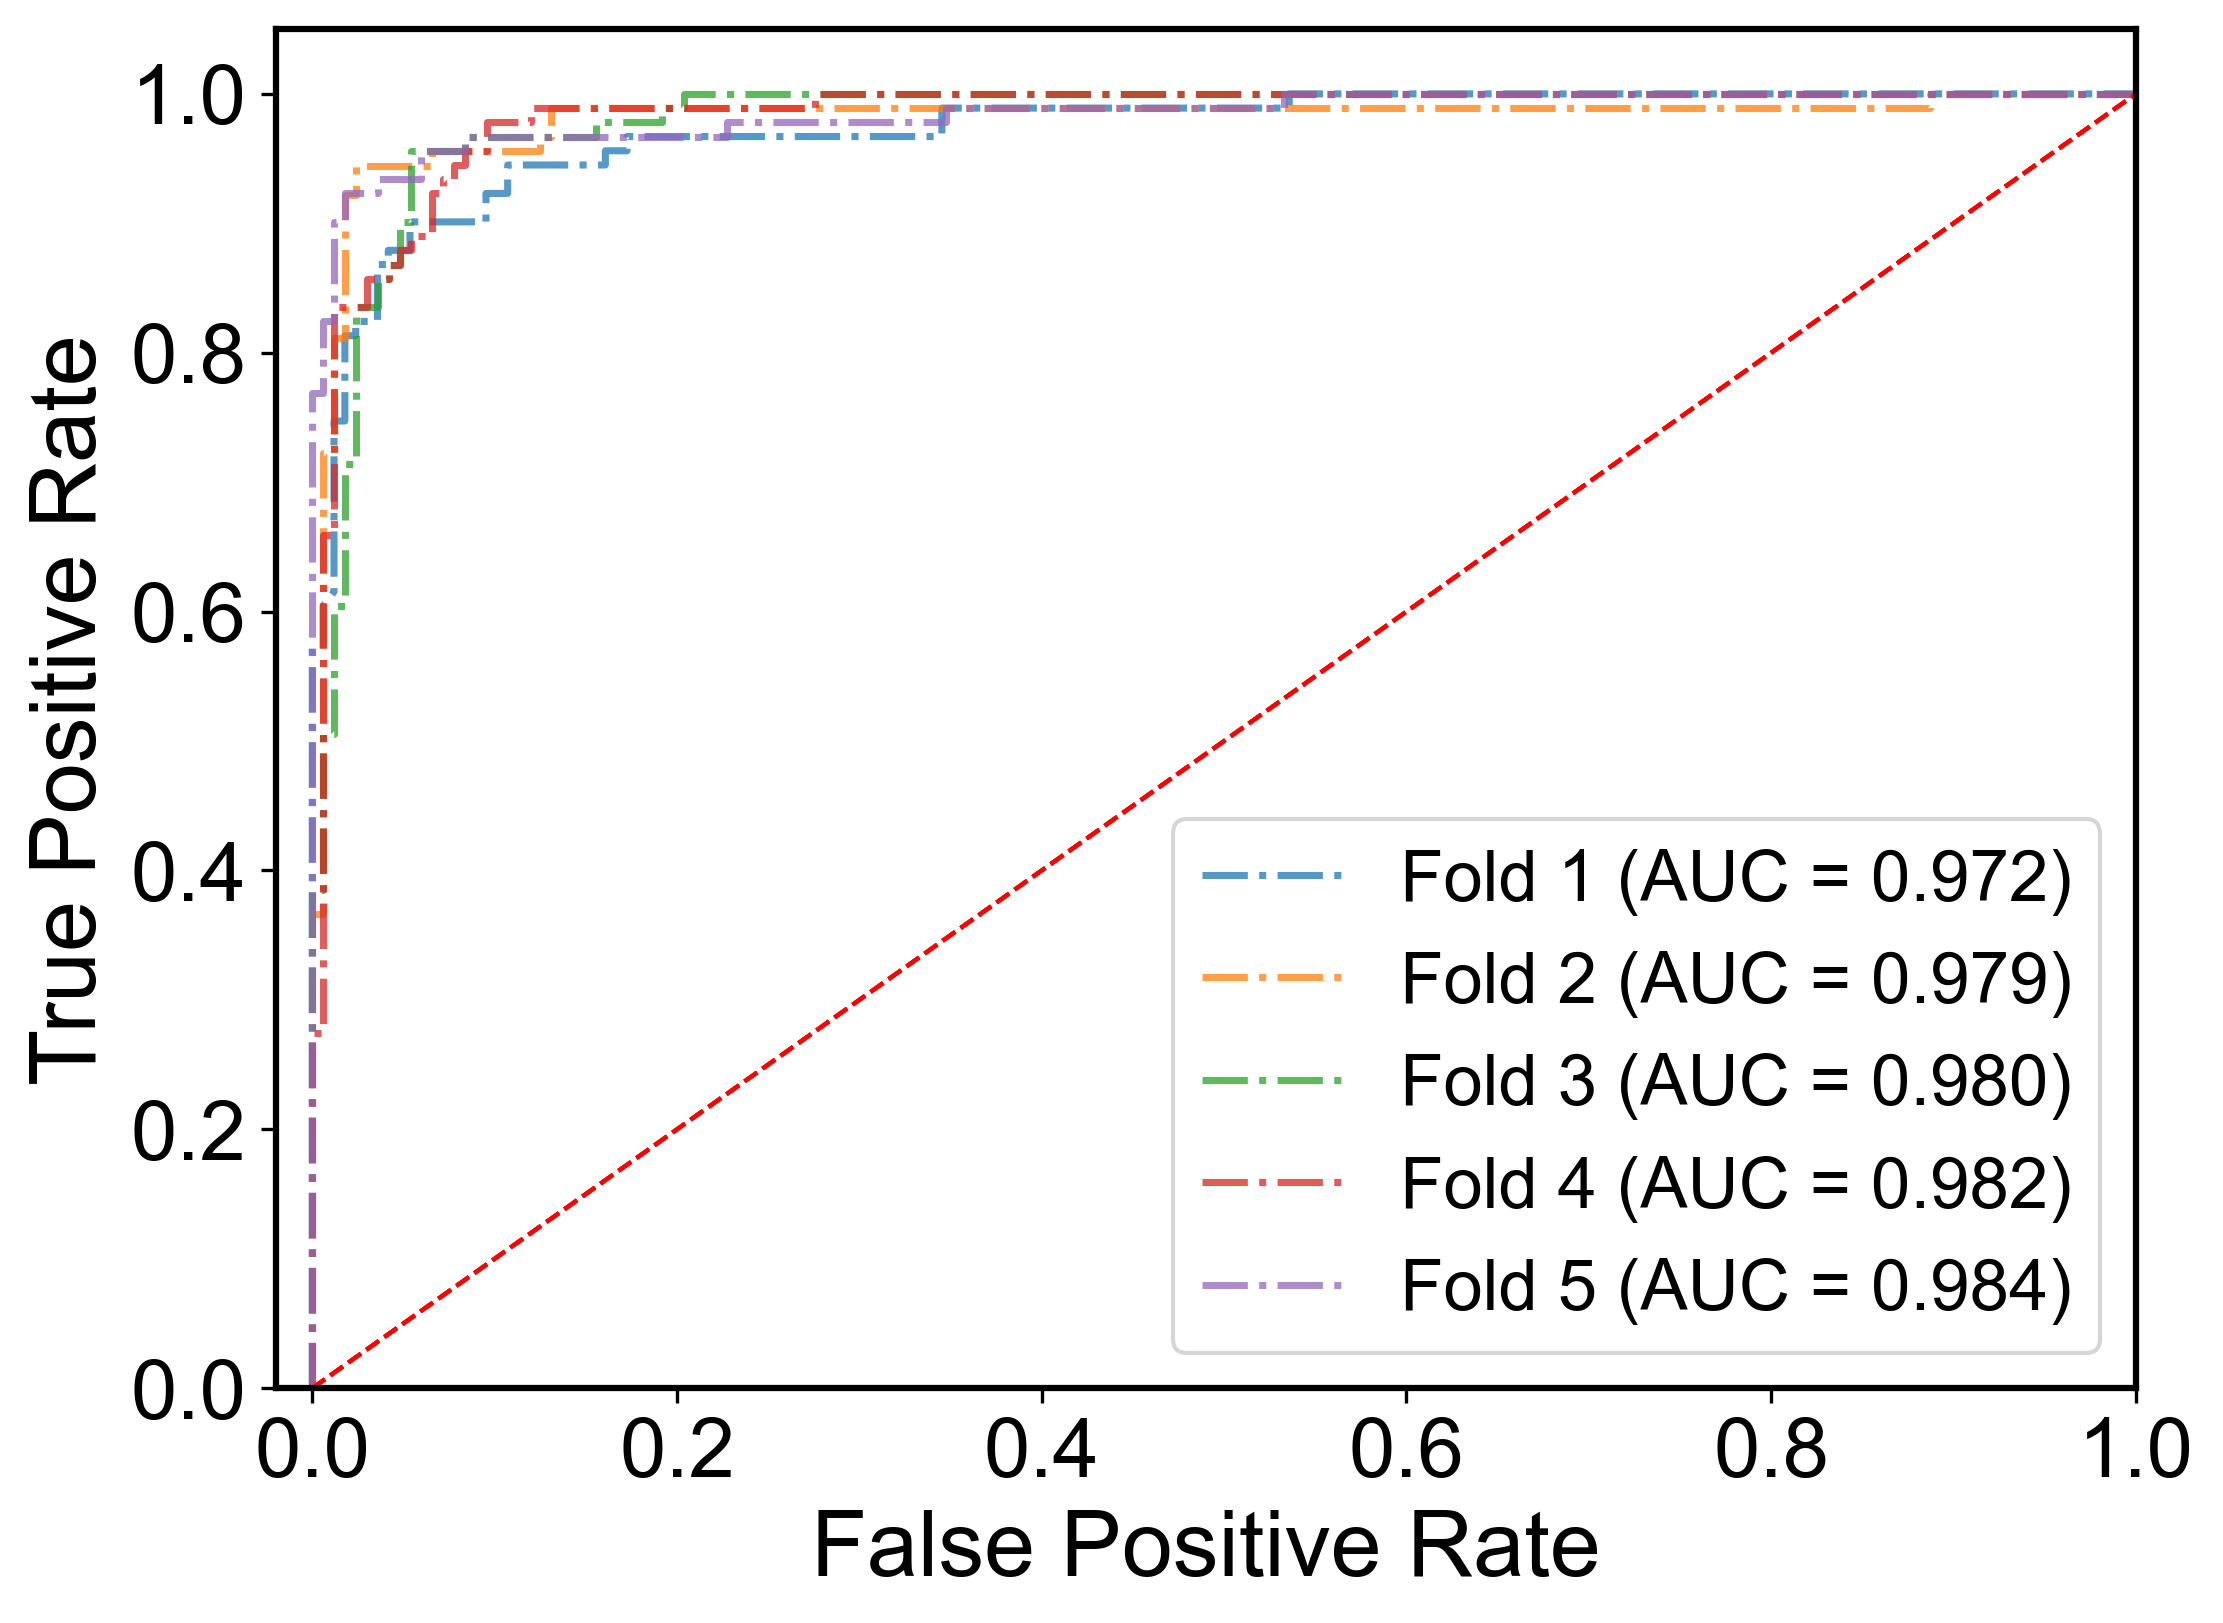

{'accuracy': 0.9426925264134567,
 'f1-score': 0.9179054186319038,
 'mcc': 0.8740762712350797,
 'roc_auc': 0.9795021747887447,
 'recall': 0.9097680097680098}

In [16]:
xgb = XGBClassifier(n_jobs=-1, random_state=42)
xgb_result, xgb_models = fold5_ensemble(xgb, X_xgb, y)
xgb_result

In [ ]:
##############################################

In [39]:
from joblib import dump

dump(xgb_models, './model/bgclass_xgb_cn.joblib')
# loaded_model = load(model_filename)

['bgclass_xgb_cn.joblib']

In [7]:
feature_xgb =  ['B_Density', 'C_dipole Polarizability', 'A_number of Valence Electrons', 'C_Period', 'A_Electronegativity',
                'A_number of s+p Electrons', 'B_number of s+p Electrons', 'X_number of s+p Electrons', 'C_Mulliken EN', 'X_Mulliken EN',
                '(A+B+C)-X_number of Valence Electrons', 'A-B_Electronegativity', 'A-B_number of s+p Electrons', 'A-C_number of d Electrons',
                '(A+B+C)-X_number of d Electrons'] 

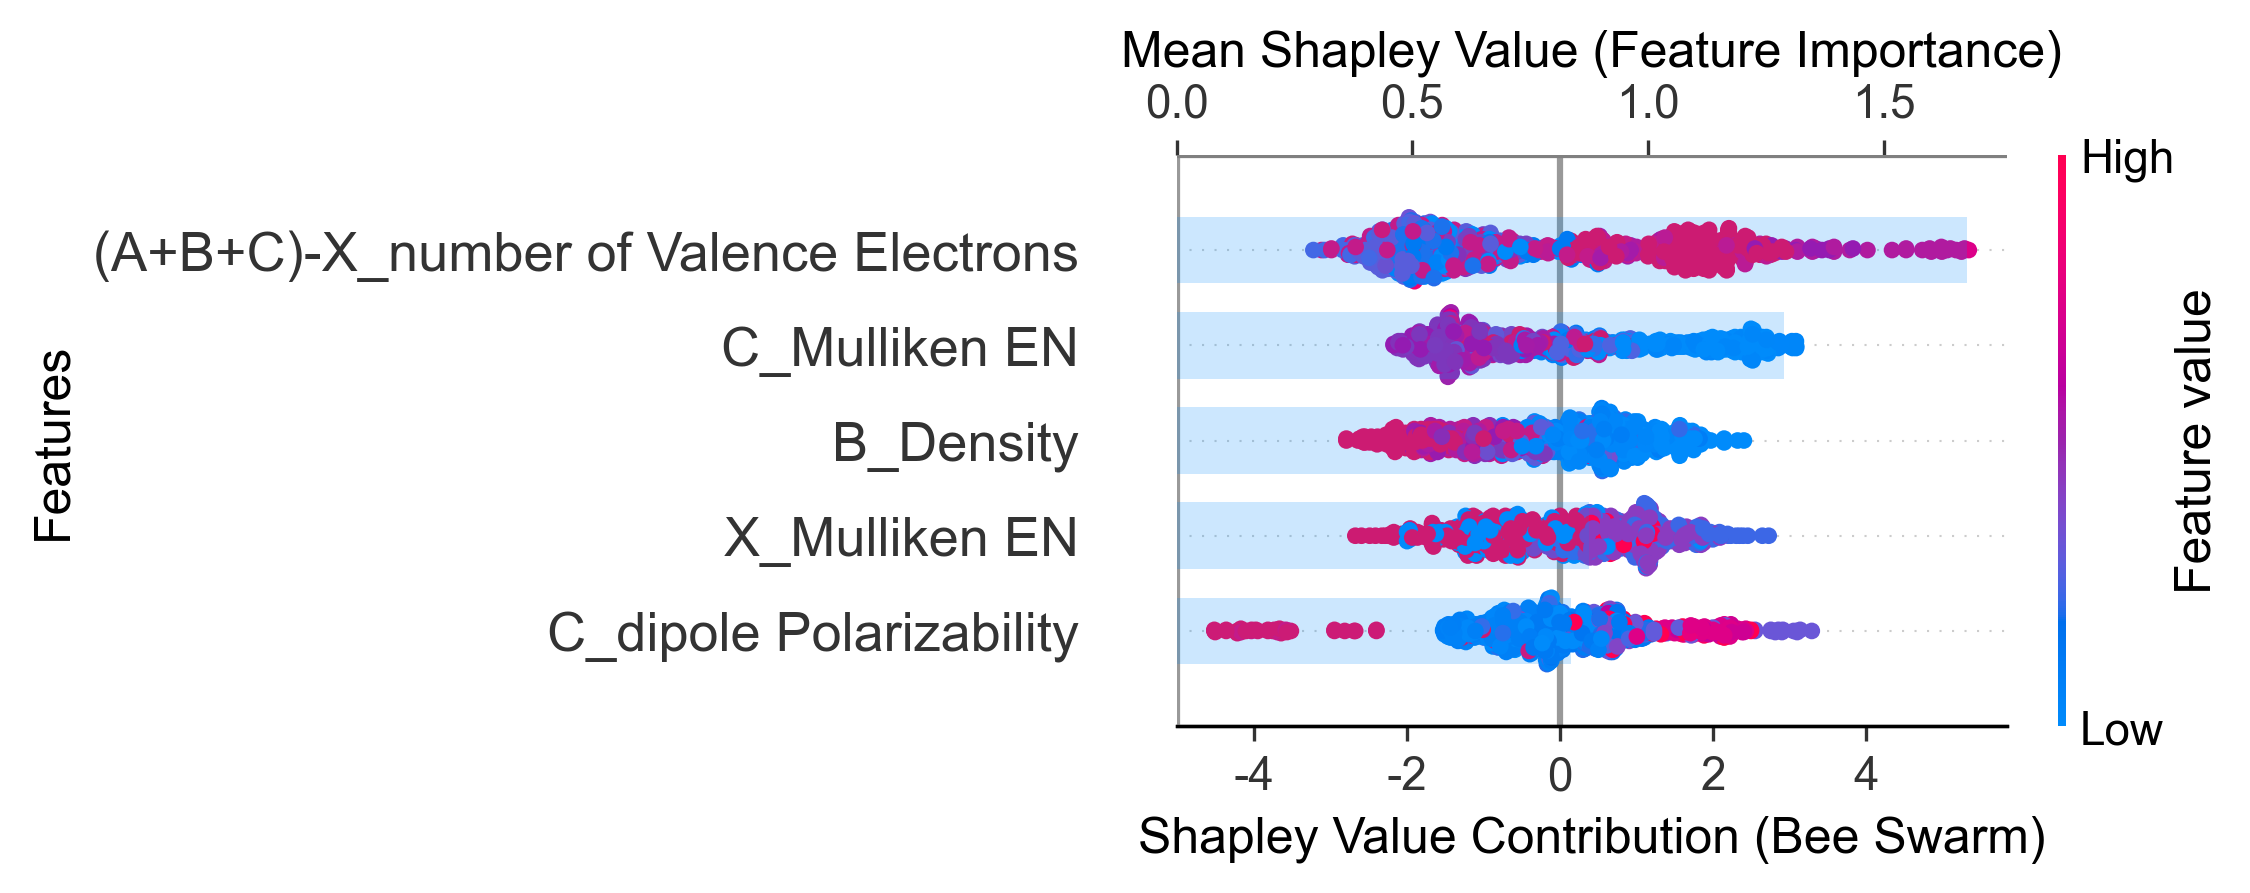

In [34]:
shap.summary_plot(shap_values, test, plot_type="dot", show=False,max_display=5,color_bar=True)
plt.gca().set_position([0.2, 0.2, 0.65, 0.65]) 
ax1 = plt.gca()
ax2 = ax1.twiny()
shap.summary_plot(shap_values, test, plot_type="bar", show=False,max_display=5)
plt.gca().set_position([0.2, 0.2, 0.65, 0.65])  
ax2.axhline(y=5, color='gray', linestyle='-', linewidth=1.5) 
bars = ax2.patches  

for bar in bars:    
    bar.set_alpha(0.2)  

ax1.set_xlabel('Shapley Value Contribution (Bee Swarm)', fontsize=12)
ax2.set_xlabel('Mean Shapley Value (Feature Importance)', fontsize=12)
ax2.xaxis.set_ticks_position('top') 
ax2.xaxis.set_label_position('top')
plt.subplots_adjust(
    left=0.2,    
    right=0.75, 
    top=0.85,    
    bottom=0.15  
)

ax1.set_ylabel('Features', fontsize=12)
plt.tight_layout()
plt.savefig('./picture/bgclass_shap.png', bbox_inches='tight')
plt.show()

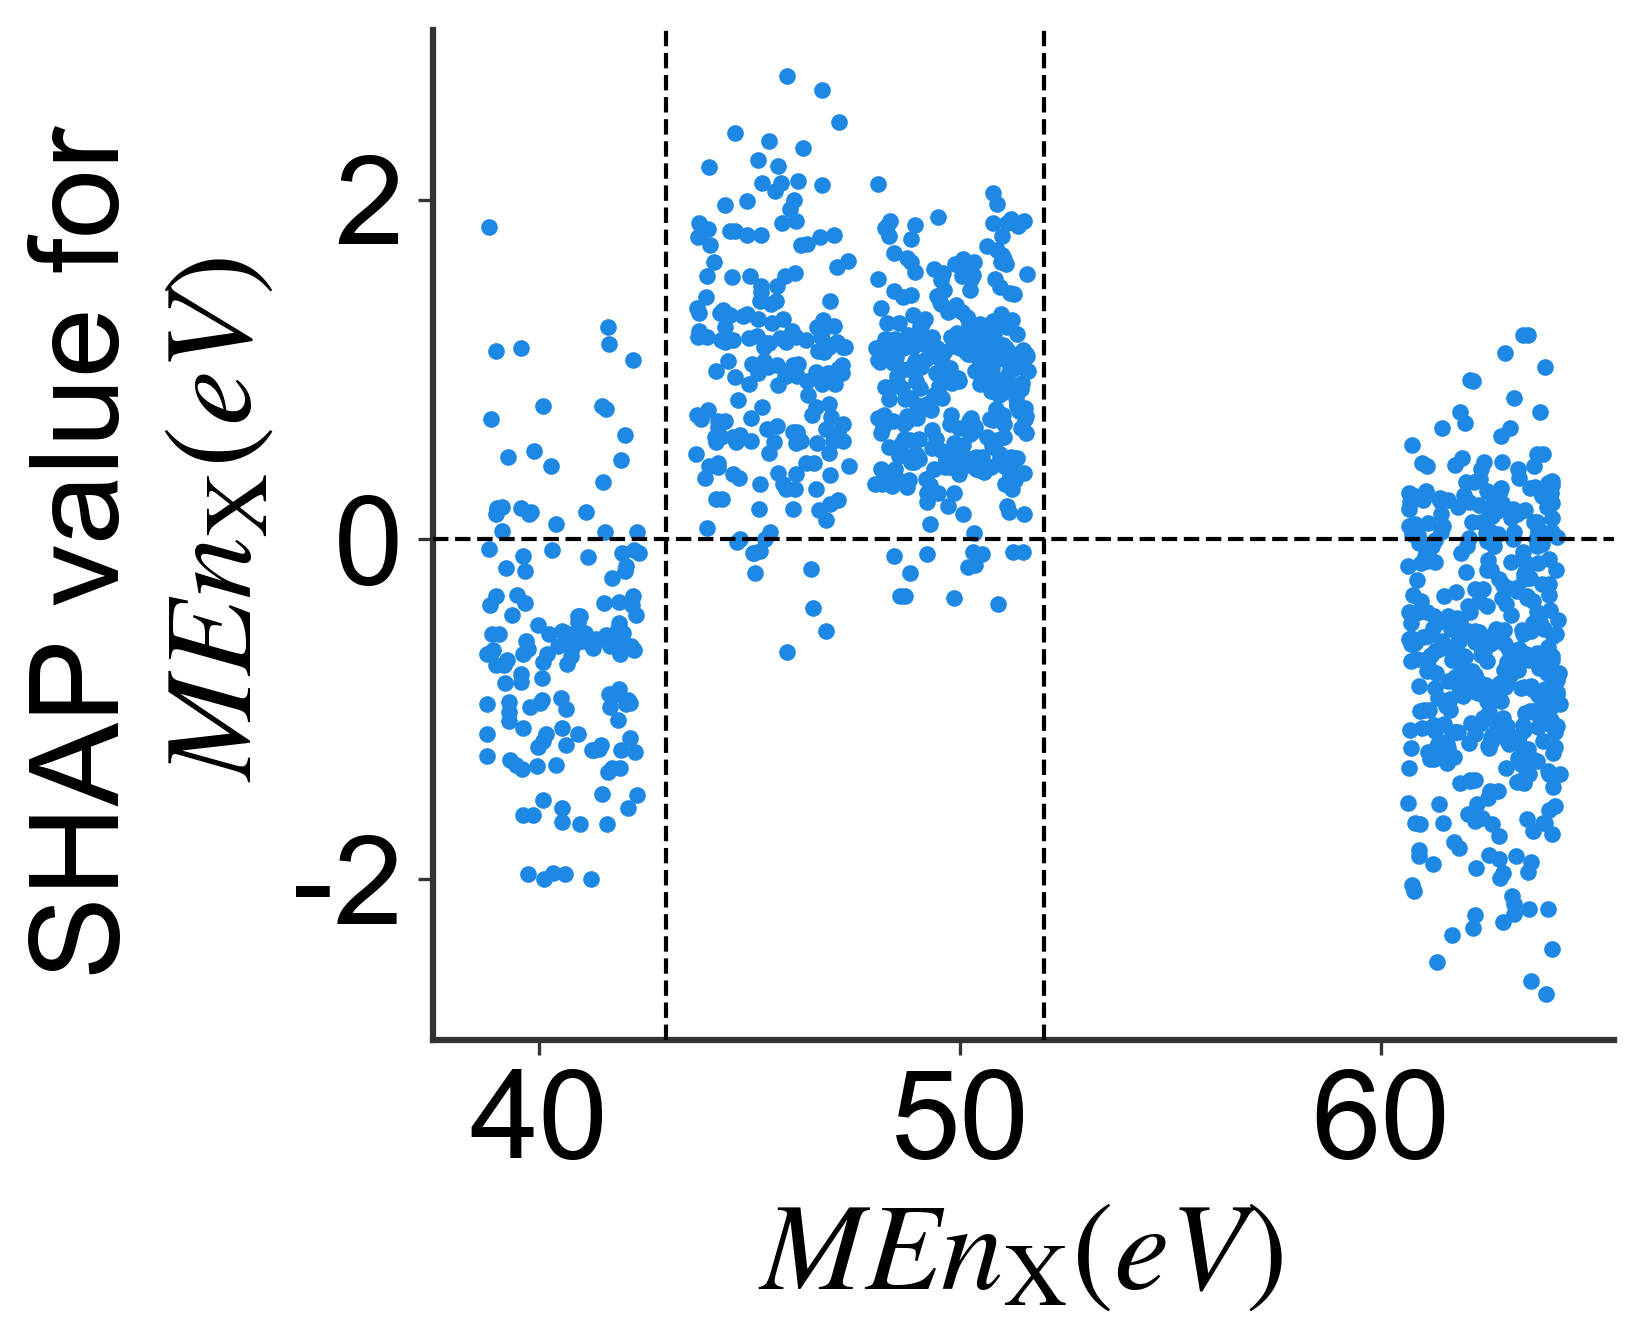

In [76]:
shap.plots.scatter(shap_values[:, 'X_Mulliken EN'], hist=False)
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(1.5)
ax.tick_params(axis='both', which='major', labelsize=30)
plt.setp(ax.get_xticklabels(), fontweight=550,color='black')  
plt.setp(ax.get_yticklabels(), fontweight=550,color='black') 
ax.set_ylabel("SHAP value for \n $MEn_{\mathrm{X}} (eV)$", fontsize=30,fontweight=550,color='black')
ax.set_xlabel(r"$MEn_{\mathrm{X}} (eV)$ ", fontsize=30,fontweight=550,color='black')
plt.tight_layout()
ax.axhline(y=0,color='black',linestyle='--',linewidth=1,zorder=3)
ax.axvline(x=43,color='black',linestyle='--',linewidth=1,zorder=3)
ax.axvline(x=52,color='black',linestyle='--',linewidth=1,zorder=3)
plt.savefig("./picture/bgclass_shap1.png", dpi=300, bbox_inches="tight")
plt.show()

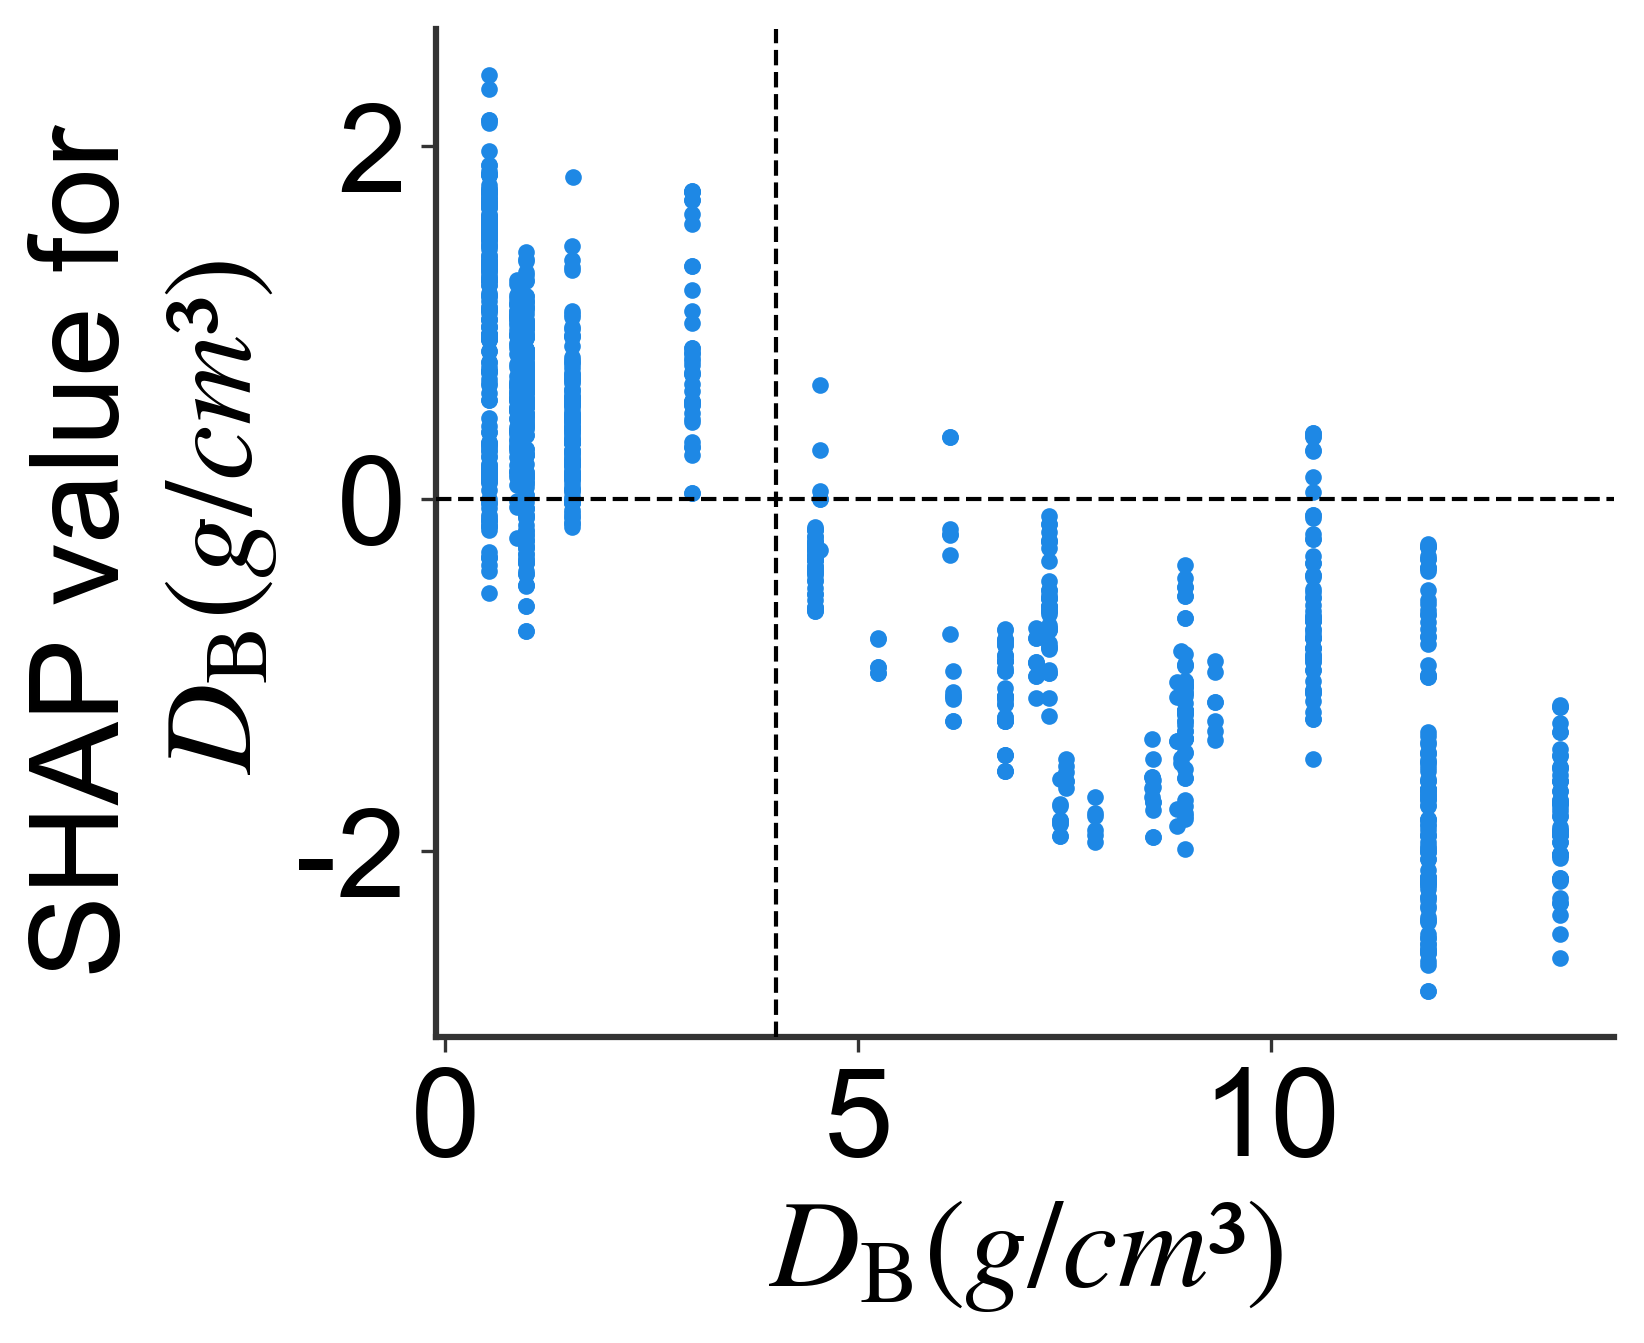

In [77]:
shap.plots.scatter(shap_values[:, 'B_Density'], hist=False)
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(1.5)
ax.tick_params(axis='both', which='major', labelsize=30)
plt.setp(ax.get_xticklabels(), fontweight=550,color='black')  # x轴加粗
plt.setp(ax.get_yticklabels(), fontweight=550,color='black') 
ax.set_ylabel("SHAP value for \n $D_{\mathrm{B}} (g/cm³)$", fontsize=30,fontweight=550,color='black')
ax.set_xlabel(r"$D_{\mathrm{B}} (g/cm³)$", fontsize=30,fontweight=550,color='black')
plt.tight_layout()
ax.axhline(y=0,color='black',linestyle='--',linewidth=1,zorder=3)
ax.axvline(x=4,color='black',linestyle='--',linewidth=1,zorder=3)
plt.savefig("./picture/bgclass_shap2.png", dpi=300, bbox_inches="tight")
plt.show()

# predicting bandgap type and screening candidate space

In [3]:
data = pd.read_csv('./data/data_tf.csv')
data

,formula,number,A_Density,B_Density,C_Density,X_Density,A_dipole Polarizability,B_dipole Polarizability,C_dipole Polarizability,X_dipole Polarizability,A_covalent Radius,B_covalent Radius,C_covalent Radius,X_covalent Radius,A_atomic Radius,B_atomic Radius,C_atomic Radius,X_atomic Radius,A_FirstIonization,B_FirstIonization,C_FirstIonization,X_FirstIonization,A_number of Valence Electrons,B_number of Valence Electrons,C_number of Valence Electrons,X_number of Valence Electrons,A_number,B_number,C_number,X_number,...,A-B_covalent Radius,A-C_covalent Radius,(A+B+C)-X_covalent Radius,A-B_atomic Radius,A-C_atomic Radius,(A+B+C)-X_atomic Radius,A-B_FirstIonization,A-C_FirstIonization,(A+B+C)-X_FirstIonization,A-B_number of Valence Electrons,A-C_number of Valence Electrons,(A+B+C)-X_number of Valence Electrons,A-B_number,A-C_number,(A+B+C)-X_number,A-B_Period,A-C_Period,(A+B+C)-X_Period,A-B_Electronegativity,A-C_Electronegativity,(A+B+C)-X_Electronegativity,A-B_number of s+p Electrons,A-C_number of s+p Electrons,(A+B+C)-X_number of s+p Electrons,A-B_number of d Electrons,A-C_number of d Electrons,(A+B+C)-X_number of d Electrons,A-B_Mulliken EN,A-C_Mulliken EN,(A+B+C)-X_Mulliken EN
0,Li2NaBF6,1,1.068,0.971,2.34000,0.0102,328.225,162.7000,20.5,22.44,266,155,85,384,2.9,1.80,0.85,3.0,1040.4,495.8,800.6,10086.0,2,1,3,42,6,11,5,54,...,111,181,122,1.10,2.05,2.55,544.6,239.8,7749.2,1,1,36,5,1,32,1,2,3,1.03,0.08,18.95,1,1,36,0,0,0,3.17,1.73,49.30
1,Li2NaNF6,1,1.068,0.971,0.00125,0.0102,328.225,162.7000,7.4,22.44,266,155,71,384,2.9,1.80,0.65,3.0,1040.4,495.8,1402.3,10086.0,2,1,5,42,6,11,7,54,...,111,195,108,1.10,2.25,2.35,544.6,361.9,7147.5,1,3,34,5,1,30,1,2,3,1.03,1.08,17.95,1,3,34,0,0,0,3.17,1.28,46.29
2,Li2CuAlF6,1,1.068,8.960,2.70000,0.0102,328.225,46.5000,57.8,22.44,266,112,126,384,2.9,1.35,1.25,3.0,1040.4,745.5,577.5,10086.0,2,11,3,42,6,29,13,54,...,154,140,120,1.55,1.65,2.50,294.9,462.9,7722.6,9,1,26,23,7,6,0,1,1,0.06,0.35,18.41,1,1,36,10,0,10,1.54,2.79,48.73
3,Li2CuPF6,1,1.068,8.960,1.82000,0.0102,328.225,46.5000,25.0,22.44,266,112,111,384,2.9,1.35,1.00,3.0,1040.4,745.5,1011.8,10086.0,2,11,5,42,6,29,15,54,...,154,155,105,1.55,1.90,2.25,294.9,28.6,7288.3,9,3,24,23,9,4,0,1,1,0.06,0.23,17.83,1,3,34,10,0,10,1.54,0.40,46.34
4,Li2CuCrF6,1,1.068,8.960,7.15000,0.0102,328.225,46.5000,83.0,22.44,266,112,122,384,2.9,1.35,1.40,3.0,1040.4,745.5,652.9,10086.0,2,11,6,42,6,29,24,54,...,154,144,116,1.55,1.50,2.65,294.9,387.5,7647.2,9,4,23,23,18,5,0,0,0,0.06,0.30,18.36,1,1,38,10,5,15,1.54,2.30,48.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9081,Nd2LiCuF6,3,14.020,0.534,8.96000,0.0102,416.000,164.1125,46.5,22.44,348,133,112,384,3.7,1.45,1.35,3.0,1066.2,520.2,745.5,10086.0,6,1,11,42,120,3,29,54,...,215,236,209,2.25,2.35,3.50,546.0,320.7,7754.1,5,5,24,117,91,98,10,8,6,1.30,0.38,18.72,3,3,36,0,10,10,3.19,1.72,48.77
9082,Nd2NaCuF6,3,14.020,0.971,8.96000,0.0102,416.000,162.7000,46.5,22.44,348,155,112,384,3.7,1.80,1.35,3.0,1066.2,495.8,745.5,10086.0,6,1,11,42,120,11,29,54,...,193,236,231,1.90,2.35,3.85,570.4,320.7,7778.5,5,5,24,109,91,106,9,8,7,1.35,0.38,18.77,3,3,36,0,10,10,3.35,1.72,48.93
9083,Eu2LiCuF6,3,10.480,0.534,8.96000,0.0102,368.000,164.1125,46.5,22.44,336,133,112,384,3.7,1.45,1.35,3.0,1094.2,520.2,745.5,10086.0,6,1,11,42,126,3,29,54,...,203,224,197,2.25,2.35,3.50,574.0,348.7,7726.1,5,5,24,123,97,104,10,8,6,1.42,0.50,18.60,3,3,36,0,10,10,3.19,1.72,48.77
9084,Tm2LiCuF6,3,18.640,0.534,8.96000,0.0102,288.000,164.1125,46.5,22.44,328,133,112,384,3.5,1.45,1.35,3.0,1193.4,520.2,745.5,10086.0,6,1,11,42,138,3,29,54,...,195,216,189,2.05,2.15,3.30,673.2,447.9,7626.9,5,5,24,135,109,116,10,8,6,1.52,0.60,18.50,3,3,36,0,10,10,3.19,1.72,48.77


In [4]:
screen2 = pd.read_csv('./data/screen_slme.csv')
screen2

,formula,number
0,Li2CuAlF6,1
1,Li2CuPF6,1
2,Li2CuCrF6,1
3,Li2CuGaF6,1
4,Li2CuAsF6,1
...,...,...
2455,Tl2CaYbBr6,2
2456,Hg2LiCuF6,3
2457,Pb2LiNaF6,3
2458,Tm2LiCuF6,3


In [5]:
screen2 = pd.merge(screen2, data, on=['formula', 'number'], how='left')
screen2

,formula,number,A_Density,B_Density,C_Density,X_Density,A_dipole Polarizability,B_dipole Polarizability,C_dipole Polarizability,X_dipole Polarizability,A_covalent Radius,B_covalent Radius,C_covalent Radius,X_covalent Radius,A_atomic Radius,B_atomic Radius,C_atomic Radius,X_atomic Radius,A_FirstIonization,B_FirstIonization,C_FirstIonization,X_FirstIonization,A_number of Valence Electrons,B_number of Valence Electrons,C_number of Valence Electrons,X_number of Valence Electrons,A_number,B_number,C_number,X_number,...,A-B_covalent Radius,A-C_covalent Radius,(A+B+C)-X_covalent Radius,A-B_atomic Radius,A-C_atomic Radius,(A+B+C)-X_atomic Radius,A-B_FirstIonization,A-C_FirstIonization,(A+B+C)-X_FirstIonization,A-B_number of Valence Electrons,A-C_number of Valence Electrons,(A+B+C)-X_number of Valence Electrons,A-B_number,A-C_number,(A+B+C)-X_number,A-B_Period,A-C_Period,(A+B+C)-X_Period,A-B_Electronegativity,A-C_Electronegativity,(A+B+C)-X_Electronegativity,A-B_number of s+p Electrons,A-C_number of s+p Electrons,(A+B+C)-X_number of s+p Electrons,A-B_number of d Electrons,A-C_number of d Electrons,(A+B+C)-X_number of d Electrons,A-B_Mulliken EN,A-C_Mulliken EN,(A+B+C)-X_Mulliken EN
0,Li2CuAlF6,1,1.068,8.960,2.700,0.0102,328.225,46.5000,57.8,22.44,266,112,126,384,2.9,1.35,1.25,3.0,1040.4,745.5,577.5,10086.0,2,11,3,42,6,29,13,54,...,154,140,120,1.55,1.65,2.50,294.9,462.9,7722.6,9,1,26,23,7,6,0,1,1,0.06,0.35,18.41,1,1,36,10,0,10,1.54,2.79,48.73
1,Li2CuPF6,1,1.068,8.960,1.820,0.0102,328.225,46.5000,25.0,22.44,266,112,111,384,2.9,1.35,1.00,3.0,1040.4,745.5,1011.8,10086.0,2,11,5,42,6,29,15,54,...,154,155,105,1.55,1.90,2.25,294.9,28.6,7288.3,9,3,24,23,9,4,0,1,1,0.06,0.23,17.83,1,3,34,10,0,10,1.54,0.40,46.34
2,Li2CuCrF6,1,1.068,8.960,7.150,0.0102,328.225,46.5000,83.0,22.44,266,112,122,384,2.9,1.35,1.40,3.0,1040.4,745.5,652.9,10086.0,2,11,6,42,6,29,24,54,...,154,144,116,1.55,1.50,2.65,294.9,387.5,7647.2,9,4,23,23,18,5,0,0,0,0.06,0.30,18.36,1,1,38,10,5,15,1.54,2.30,48.24
3,Li2CuGaF6,1,1.068,8.960,5.910,0.0102,328.225,46.5000,50.0,22.44,266,112,124,384,2.9,1.35,1.30,3.0,1040.4,745.5,578.8,10086.0,2,11,3,42,6,29,31,54,...,154,142,118,1.55,1.60,2.55,294.9,461.6,7721.3,9,1,26,23,25,12,0,0,0,0.06,0.15,18.21,1,1,36,10,0,10,1.54,2.82,48.76
4,Li2CuAsF6,1,1.068,8.960,5.780,0.0102,328.225,46.5000,30.0,22.44,266,112,121,384,2.9,1.35,1.15,3.0,1040.4,745.5,947.0,10086.0,2,11,5,42,6,29,33,54,...,154,145,115,1.55,1.75,2.40,294.9,93.4,7353.1,9,3,24,23,27,14,0,0,0,0.06,0.22,17.84,1,3,34,10,0,10,1.54,0.72,46.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,Tl2CaYbBr6,2,23.800,1.540,6.970,18.7200,100.000,160.8000,139.0,126.00,288,171,170,684,3.8,1.80,1.75,6.9,1178.8,589.8,603.4,6839.4,6,2,3,42,162,20,70,210,...,117,118,55,2.00,2.05,0.45,589.0,575.4,4467.4,4,3,31,142,92,42,8,6,2,3.08,2.98,11.58,4,4,32,20,20,20,4.20,3.30,33.84
2456,Hg2LiCuF6,3,27.000,0.534,8.960,0.0102,67.820,164.1125,46.5,22.44,266,133,112,384,3.0,1.45,1.35,3.0,2014.2,520.2,745.5,10086.0,24,1,11,42,160,3,29,54,...,133,154,127,1.55,1.65,2.80,1494.0,1268.7,6806.1,23,13,6,157,131,138,10,8,6,3.02,2.10,17.00,3,3,36,20,10,30,6.81,5.34,45.15
2457,Pb2LiNaF6,3,22.600,0.534,0.971,0.0102,94.000,164.1125,162.7,22.44,288,133,155,384,3.6,1.45,1.80,3.0,1431.2,520.2,495.8,10086.0,8,1,1,42,164,3,11,54,...,155,133,192,2.15,1.80,3.85,911.0,935.4,7638.8,7,7,32,161,153,124,10,9,5,3.68,3.73,17.31,7,7,32,20,20,20,4.79,4.95,48.80
2458,Tm2LiCuF6,3,18.640,0.534,8.960,0.0102,288.000,164.1125,46.5,22.44,328,133,112,384,3.5,1.45,1.35,3.0,1193.4,520.2,745.5,10086.0,6,1,11,42,138,3,29,54,...,195,216,189,2.05,2.15,3.30,673.2,447.9,7626.9,5,5,24,135,109,116,10,8,6,1.52,0.60,18.50,3,3,36,0,10,10,3.19,1.72,48.77


In [8]:
X1 =  pd.DataFrame()
X1 = screen2[feature_xgb]
X1

,B_Density,C_dipole Polarizability,A_number of Valence Electrons,C_Period,A_Electronegativity,A_number of s+p Electrons,B_number of s+p Electrons,X_number of s+p Electrons,C_Mulliken EN,X_Mulliken EN,(A+B+C)-X_number of Valence Electrons,A-B_Electronegativity,A-B_number of s+p Electrons,A-C_number of d Electrons,(A+B+C)-X_number of d Electrons
0,8.960,57.8,2,3,1.96,2,1,42,3.23,62.46,26,0.06,1,0,10
1,8.960,25.0,2,3,1.96,2,1,42,5.62,62.46,24,0.06,1,0,10
2,8.960,83.0,2,4,1.96,2,1,42,3.72,62.46,23,0.06,1,5,15
3,8.960,50.0,2,4,1.96,2,1,42,3.20,62.46,26,0.06,1,0,10
4,8.960,30.0,2,4,1.96,2,1,42,5.30,62.46,24,0.06,1,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,1.540,139.0,6,6,4.08,6,2,42,3.10,45.54,31,3.08,4,20,20
2456,0.534,46.5,24,4,4.00,4,1,42,4.48,62.46,6,3.02,3,10,30
2457,0.534,162.7,8,3,4.66,8,1,42,2.85,62.46,32,3.68,7,20,20
2458,0.534,46.5,6,4,2.50,4,1,42,4.48,62.46,24,1.52,3,10,10


In [9]:
from joblib import load

best_model = load('./model/bgclass_xgb_cn.joblib')

In [15]:
%%time
screen = pd.DataFrame(columns=['formula','number'])
screen['formula'] = screen2['formula']
screen['number'] = screen2['number']

y_pred_ensemble = np.array([model.predict(X1) for model in best_model]).T
screen['is_gap_direct']  = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=1, arr=y_pred_ensemble)   
screen

CPU times: user 5.71 s, sys: 0 ns, total: 5.71 s
Wall time: 78.9 ms


,formula,number,is_gap_direct
0,Li2CuAlF6,1,0
1,Li2CuPF6,1,0
2,Li2CuCrF6,1,0
3,Li2CuGaF6,1,0
4,Li2CuAsF6,1,0
...,...,...,...
2455,Tl2CaYbBr6,2,1
2456,Hg2LiCuF6,3,0
2457,Pb2LiNaF6,3,0
2458,Tm2LiCuF6,3,0


In [81]:
screen['is_gap_direct'].value_counts()

is_gap_direct
0    1597
1     863
Name: count, dtype: int64

In [82]:
screen_3 = screen[screen['is_gap_direct']==1]
screen_3

,formula,number,is_gap_direct
8,Na2LiAuF6,1,1
9,Na2LiYbF6,1,1
24,K2LiInCl6,1,1
26,K2LiAuF6,1,1
27,K2LiYbF6,1,1
...,...,...,...
2441,Tl2CaCrBr6,2,1
2447,Tl2CaGeBr6,2,1
2448,Tl2CaNbBr6,2,1
2454,Tl2CaTmBr6,2,1


In [83]:
screen_3 = screen_3.drop(columns=['is_gap_direct'])
screen_3

,formula,number
8,Na2LiAuF6,1
9,Na2LiYbF6,1
24,K2LiInCl6,1
26,K2LiAuF6,1
27,K2LiYbF6,1
...,...,...
2441,Tl2CaCrBr6,2
2447,Tl2CaGeBr6,2
2448,Tl2CaNbBr6,2
2454,Tl2CaTmBr6,2


In [84]:
screen_3.to_csv('./data/screen_bandgaptype.csv',index=False)